In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl

import sys
sys.path.insert(0, '..')
from onco_gps.GPSMap import GPSMap
from onco_gps.define_components import define_components
from onco_gps.define_states import define_states

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
feature_x_sample = pd.DataFrame(np.random.random_sample((100, 100)))

NMFCC with K = 2 ...
	K = 2: 1/100 ...
	K = 2: 11/100 ...
	K = 2: 21/100 ...
	K = 2: 31/100 ...
	K = 2: 41/100 ...
	K = 2: 51/100 ...
	K = 2: 61/100 ...
	K = 2: 71/100 ...
	K = 2: 81/100 ...
	K = 2: 91/100 ...
	K = 2: 100/100 - done.


../onco_gps/cluster/cluster/hierarchical_cluster_distances_and_compute_ccc.py:29: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc = linkage(distances, method=method)


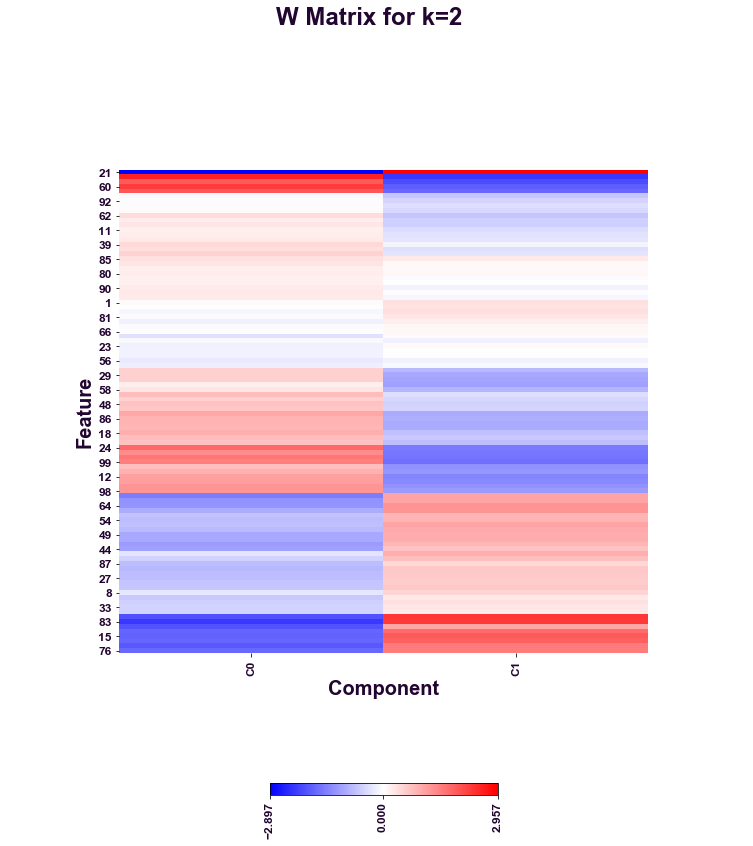

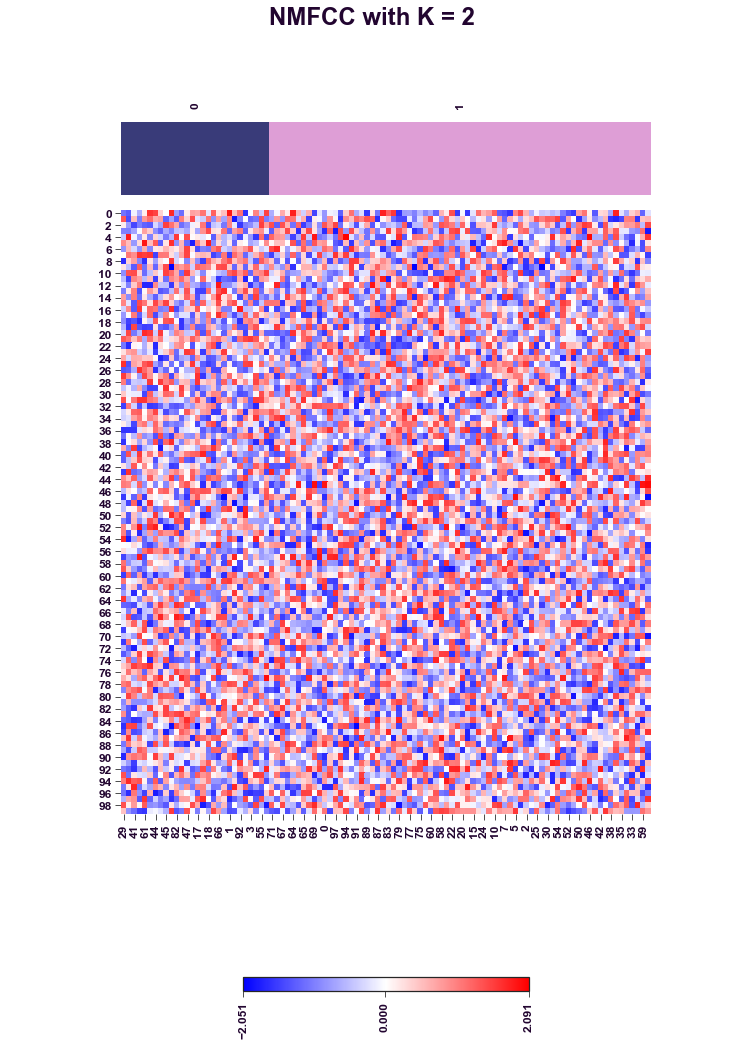

NMFCC with K = 3 ...
	K = 3: 1/100 ...
	K = 3: 11/100 ...
	K = 3: 21/100 ...
	K = 3: 31/100 ...
	K = 3: 41/100 ...
	K = 3: 51/100 ...
	K = 3: 61/100 ...
	K = 3: 71/100 ...
	K = 3: 81/100 ...
	K = 3: 91/100 ...
	K = 3: 100/100 - done.


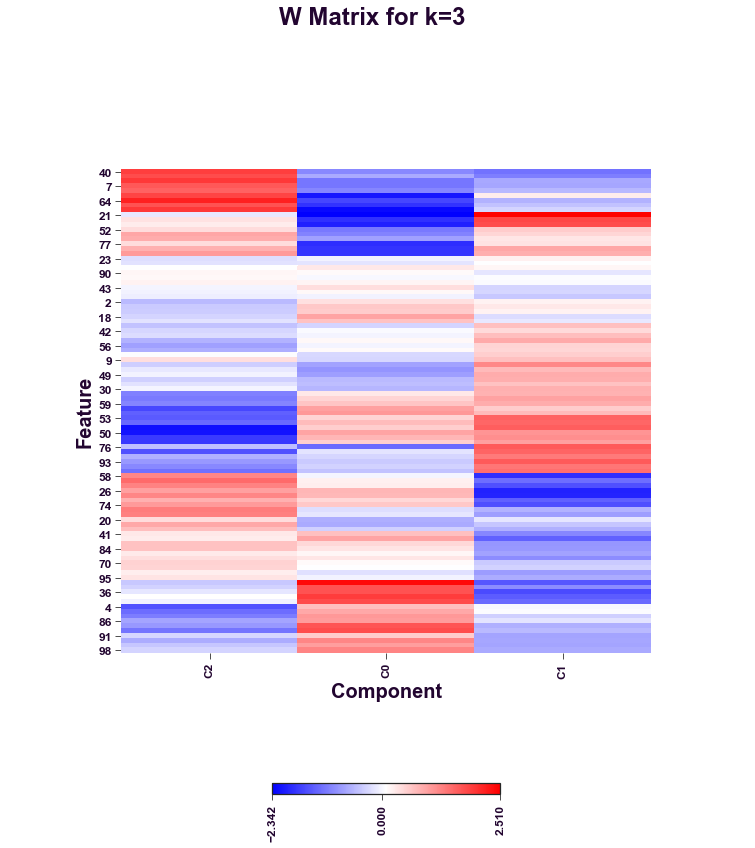

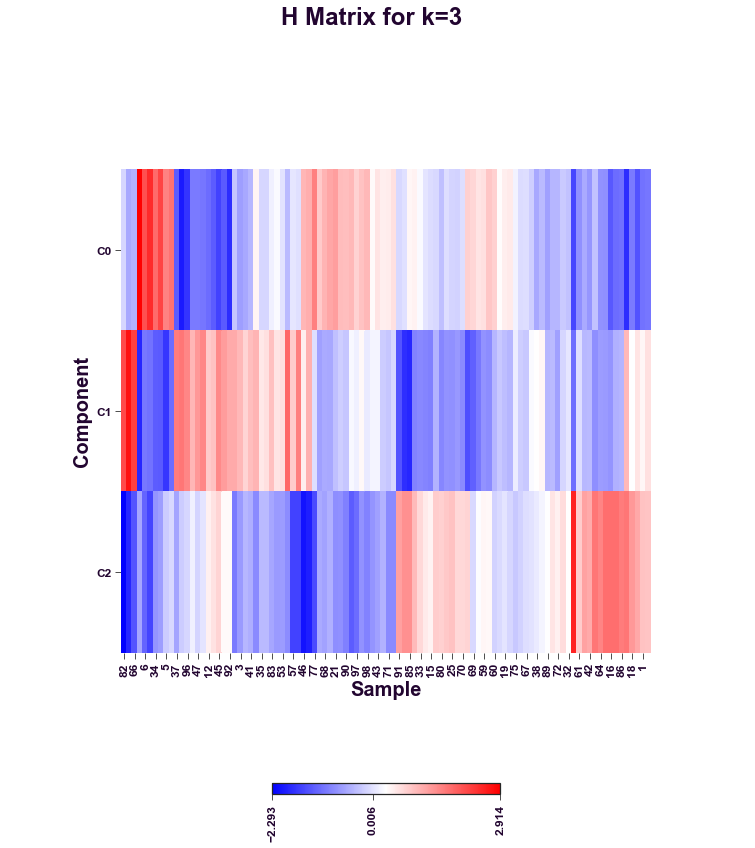

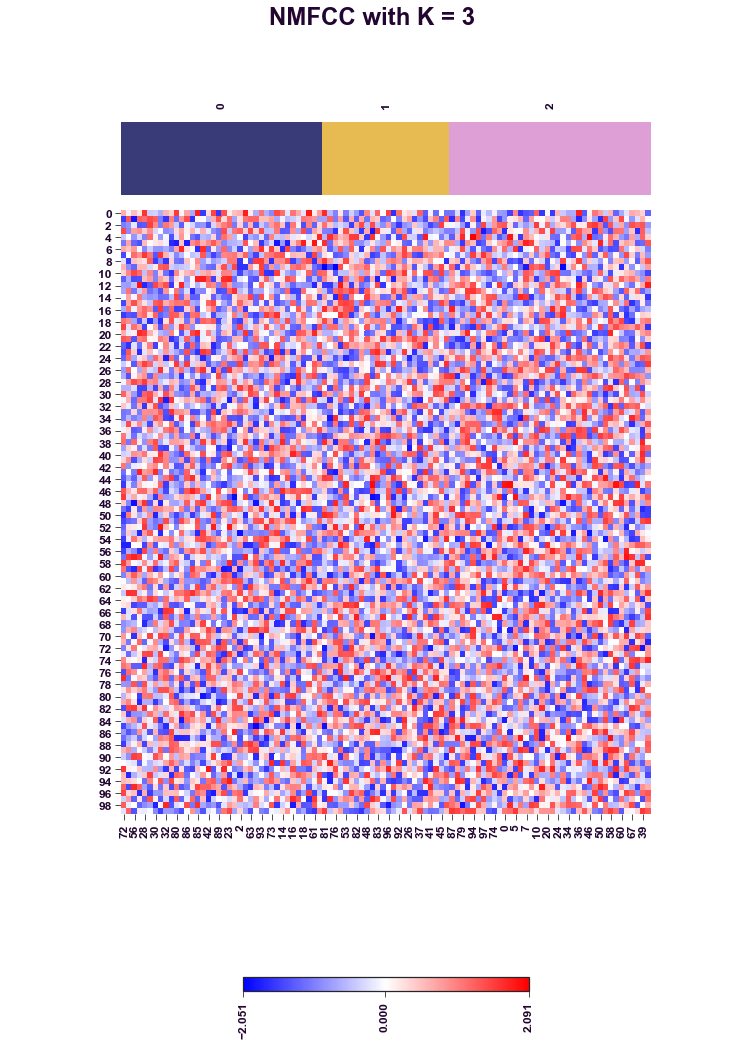

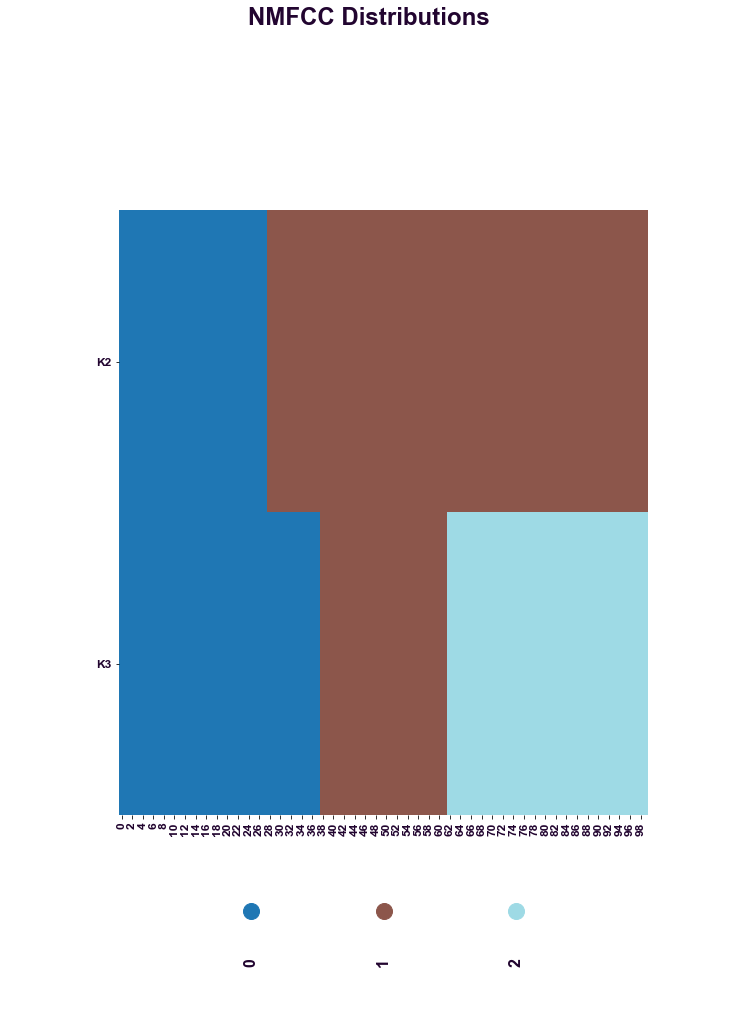

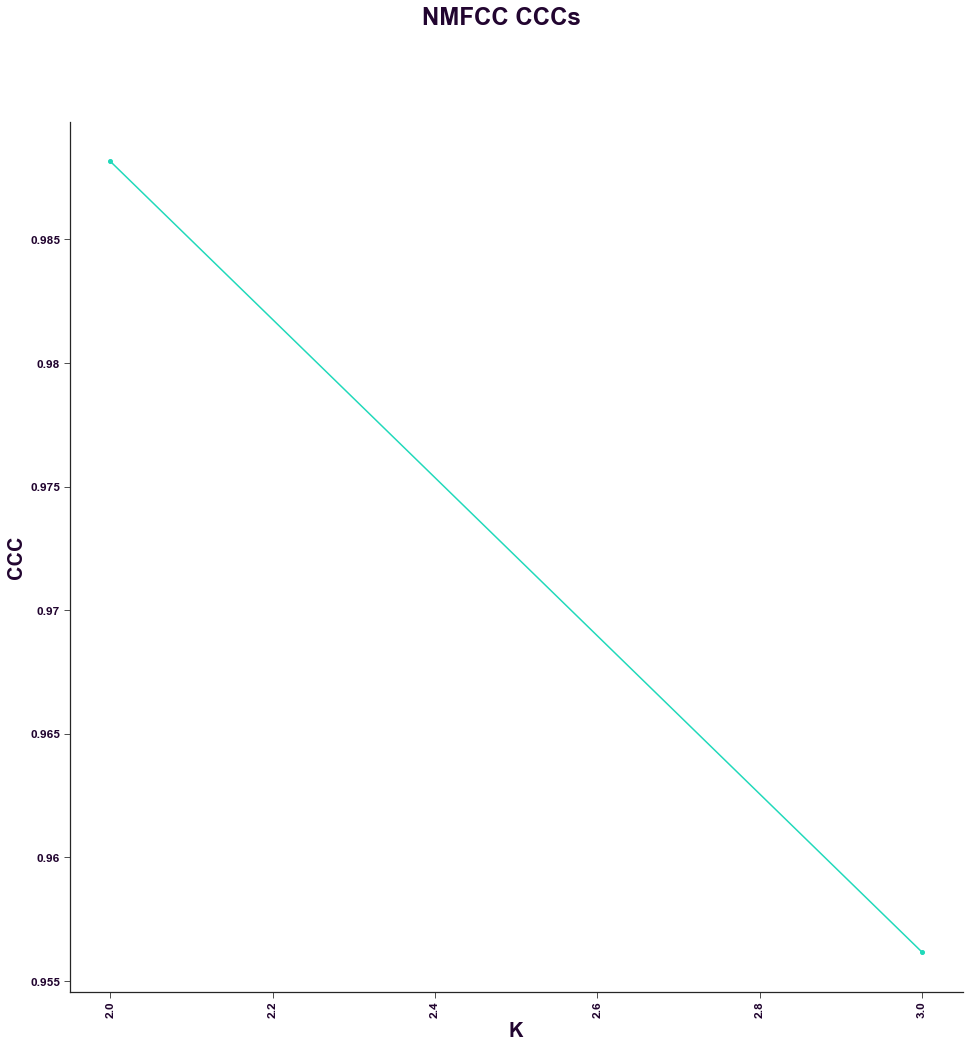

In [3]:
# Define components

nmfs, cs, cccs = define_components(feature_x_sample, [2,3], directory_path='.')

Computing distances with <function compute_information_distance at 0x11626ebf8> ...
Applying <function compute_information_distance at 0x11626ebf8> ...
	1/100 ...
	11/100 ...
	21/100 ...
	31/100 ...
	41/100 ...
	51/100 ...
	61/100 ...
	71/100 ...
	81/100 ...
	91/100 ...
	100/100 - done.


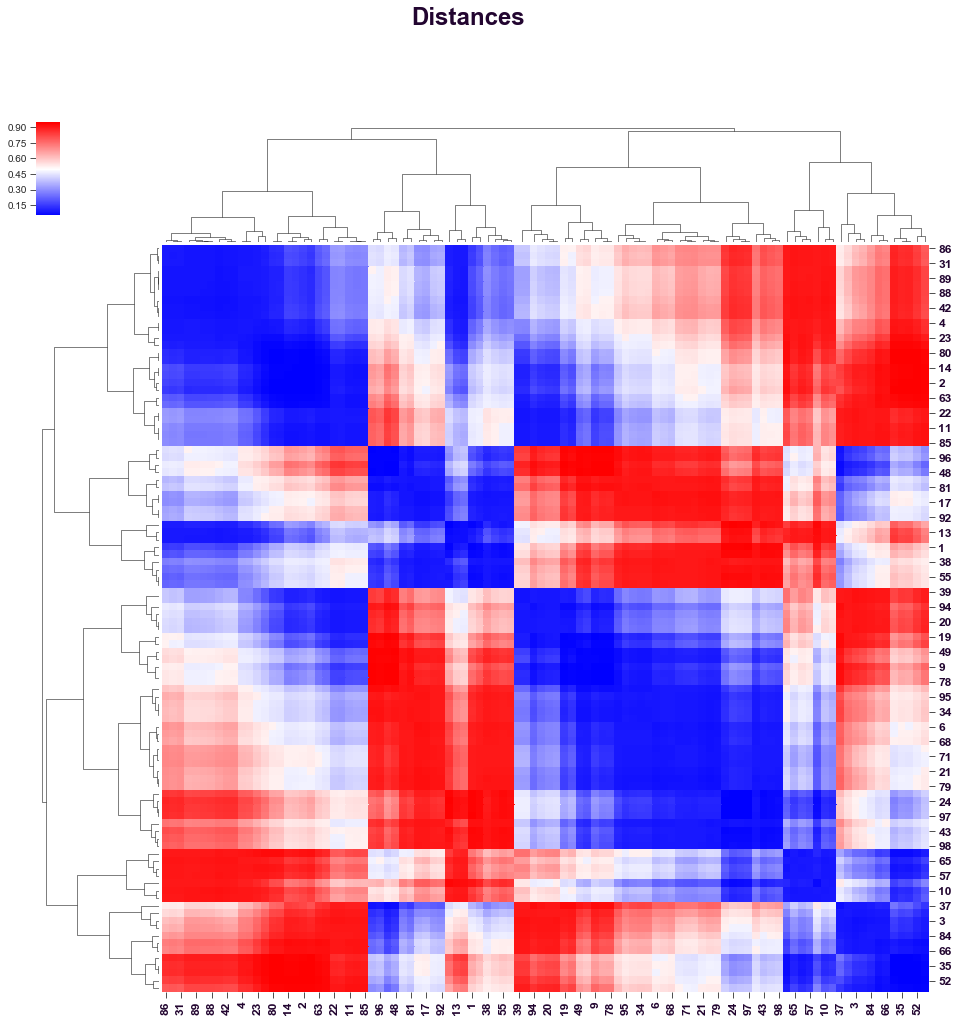

HCC with K = 2 ...
	K = 2: 1/100 ...
	K = 2: 11/100 ...
	K = 2: 21/100 ...
	K = 2: 31/100 ...
	K = 2: 41/100 ...
	K = 2: 51/100 ...
	K = 2: 61/100 ...
	K = 2: 71/100 ...
	K = 2: 81/100 ...
	K = 2: 91/100 ...
	K = 2: 100/100 - done.


../onco_gps/cluster/cluster/hierarchical_cluster_distances_and_compute_ccc.py:29: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc = linkage(distances, method=method)


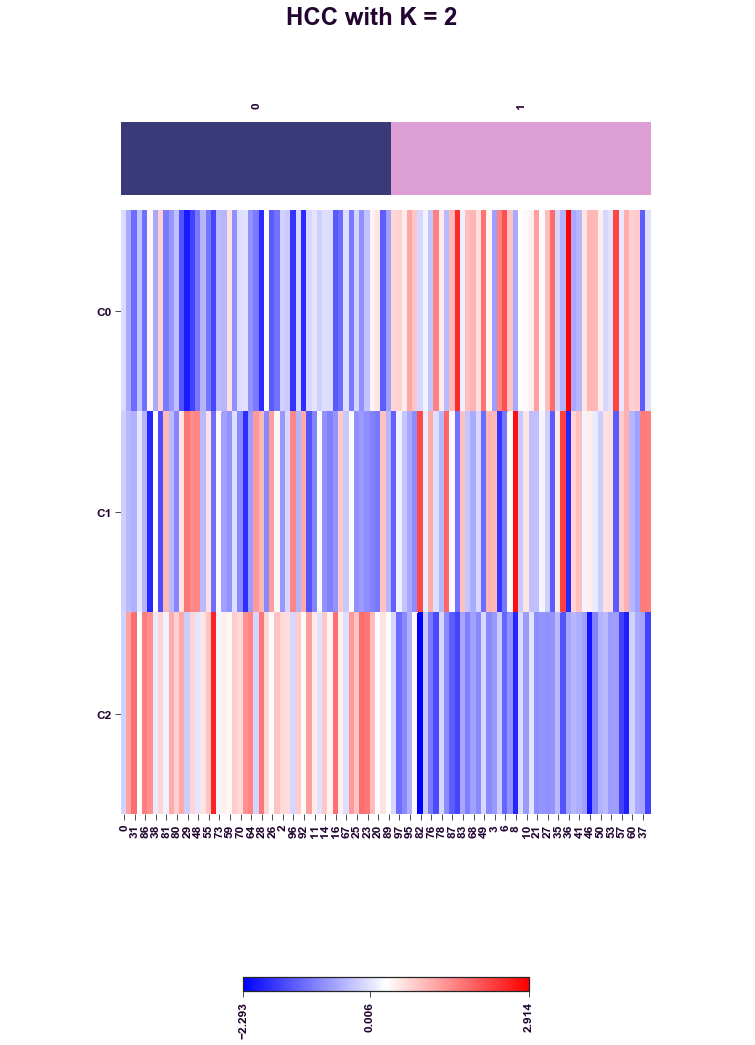

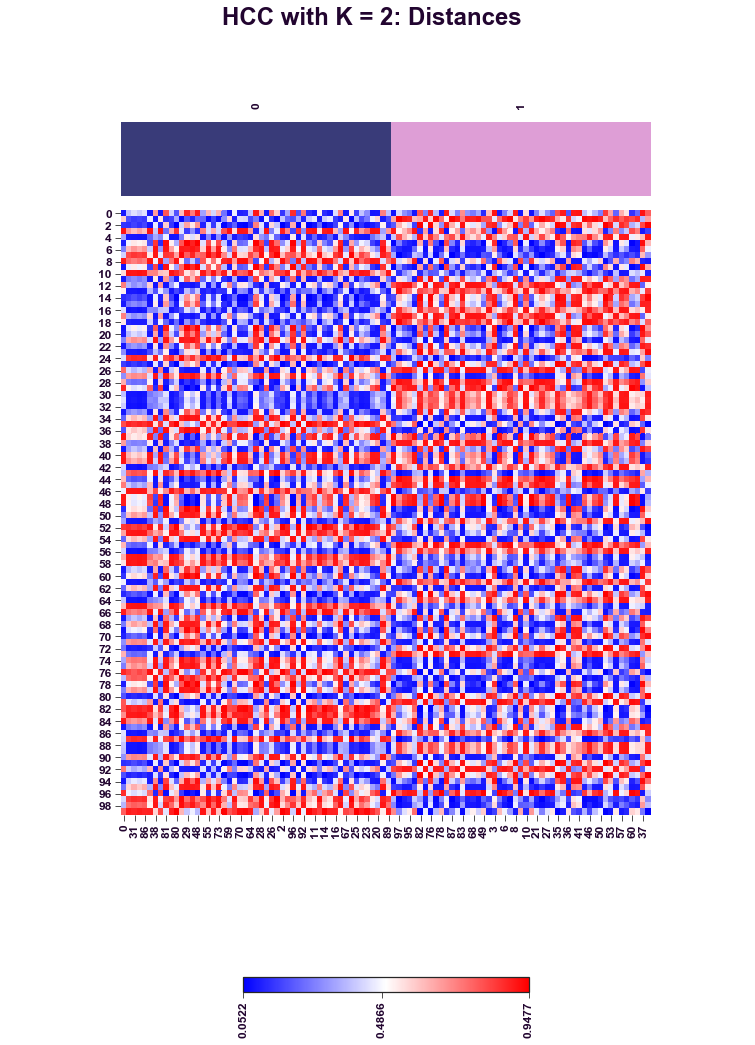

HCC with K = 3 ...
	K = 3: 1/100 ...
	K = 3: 11/100 ...
	K = 3: 21/100 ...
	K = 3: 31/100 ...
	K = 3: 41/100 ...
	K = 3: 51/100 ...
	K = 3: 61/100 ...
	K = 3: 71/100 ...
	K = 3: 81/100 ...
	K = 3: 91/100 ...
	K = 3: 100/100 - done.


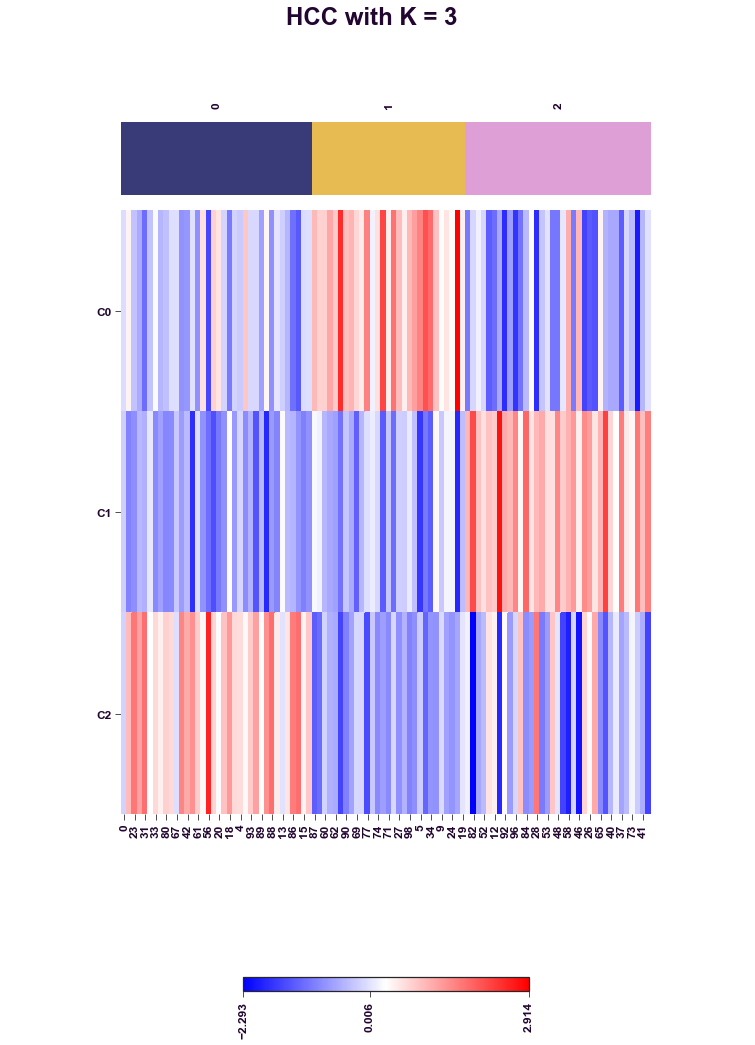

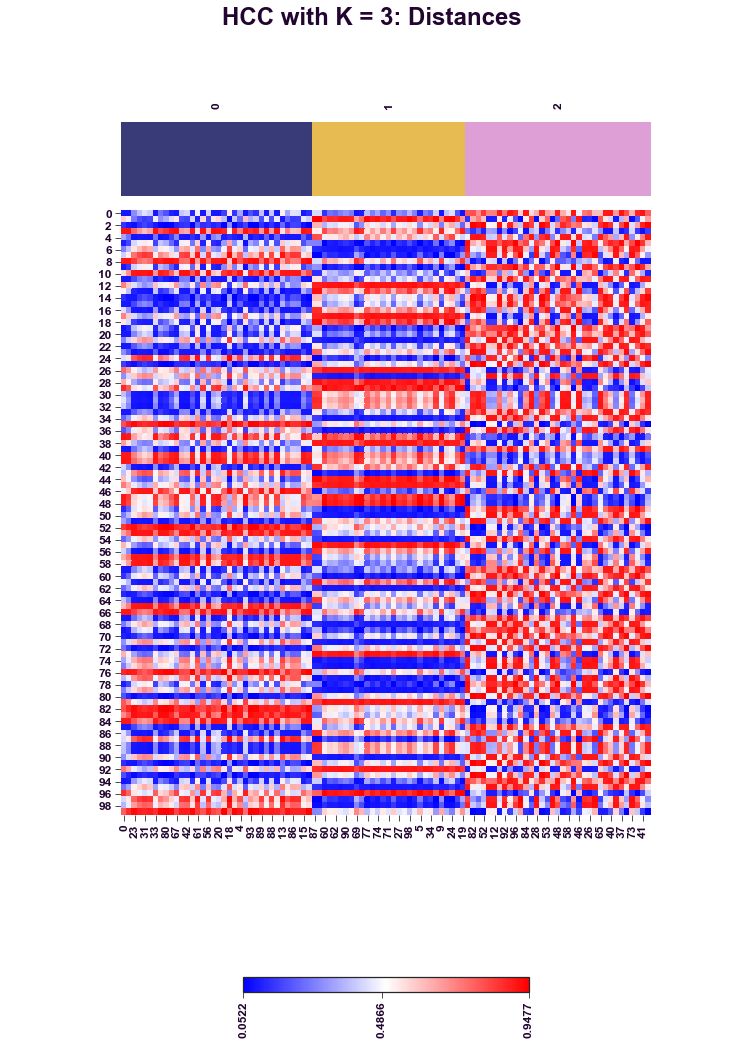

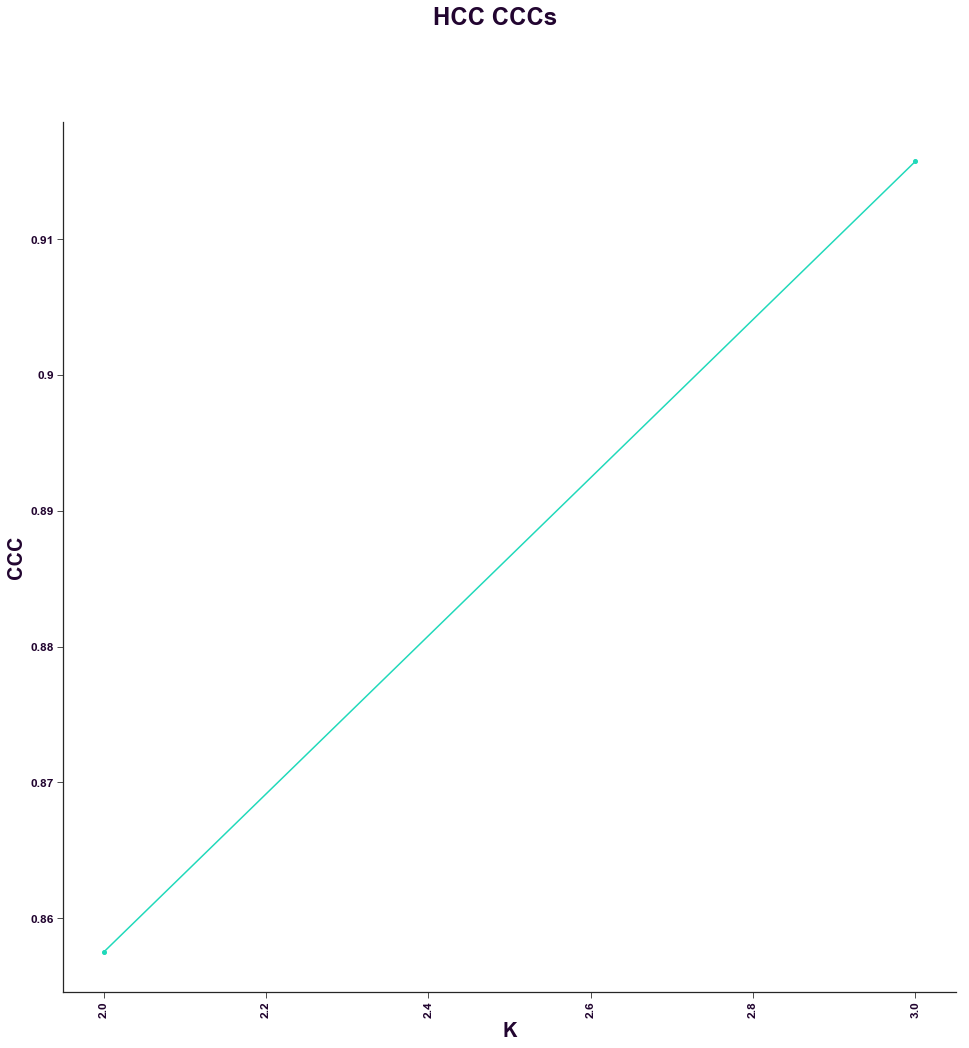

In [4]:
# Define states

ds, hcs, cs, cccs = define_states(nmfs['K3']['h'], [2, 3], '.')

In [5]:
# Simulate node-x-sample

node_x_sample = pd.DataFrame(np.random.random_sample((3, 30)))
node_x_sample.index = [
    'Node {}'.format(i) for i in range(1, 1 + node_x_sample.shape[0])
]
node_x_sample.columns = [
    'Sample {}'.format(i) for i in range(1, 1 + node_x_sample.shape[1])
]

node_x_sample

Sample 1  Sample 2  Sample 3  Sample 4  Sample 5  Sample 6  Sample 7  \
Node 1  0.680434  0.592041  0.273859  0.417976  0.744461  0.092021  0.195240   
Node 2  0.637109  0.275024  0.483312  0.558182  0.687266  0.136500  0.906504   
Node 3  0.398593  0.997094  0.300667  0.934087  0.914344  0.727090  0.379951   

        Sample 8  Sample 9  Sample 10    ...      Sample 21  Sample 22  \
Node 1  0.422049  0.434608   0.194092    ...       0.472235   0.019212   
Node 2  0.982103  0.608994   0.062920    ...       0.165971   0.769649   
Node 3  0.160214  0.227681   0.677574    ...       0.762895   0.970704   

        Sample 23  Sample 24  Sample 25  Sample 26  Sample 27  Sample 28  \
Node 1   0.970689   0.362548   0.216193   0.182422   0.511653   0.166782   
Node 2   0.338418   0.868808   0.374021   0.500518   0.912980   0.731087   
Node 3   0.451949   0.764095   0.024336   0.307412   0.757671   0.278294   

        Sample 29  Sample 30  
Node 1   0.266294   0.612011  
Node 2   0.784207   0.787649  
Node 3   0.970952   0.615219  

[3 rows x 30 columns]

In [6]:
# Initialize a GPSMap

gps_map = GPSMap(node_x_sample, pull_power=2)

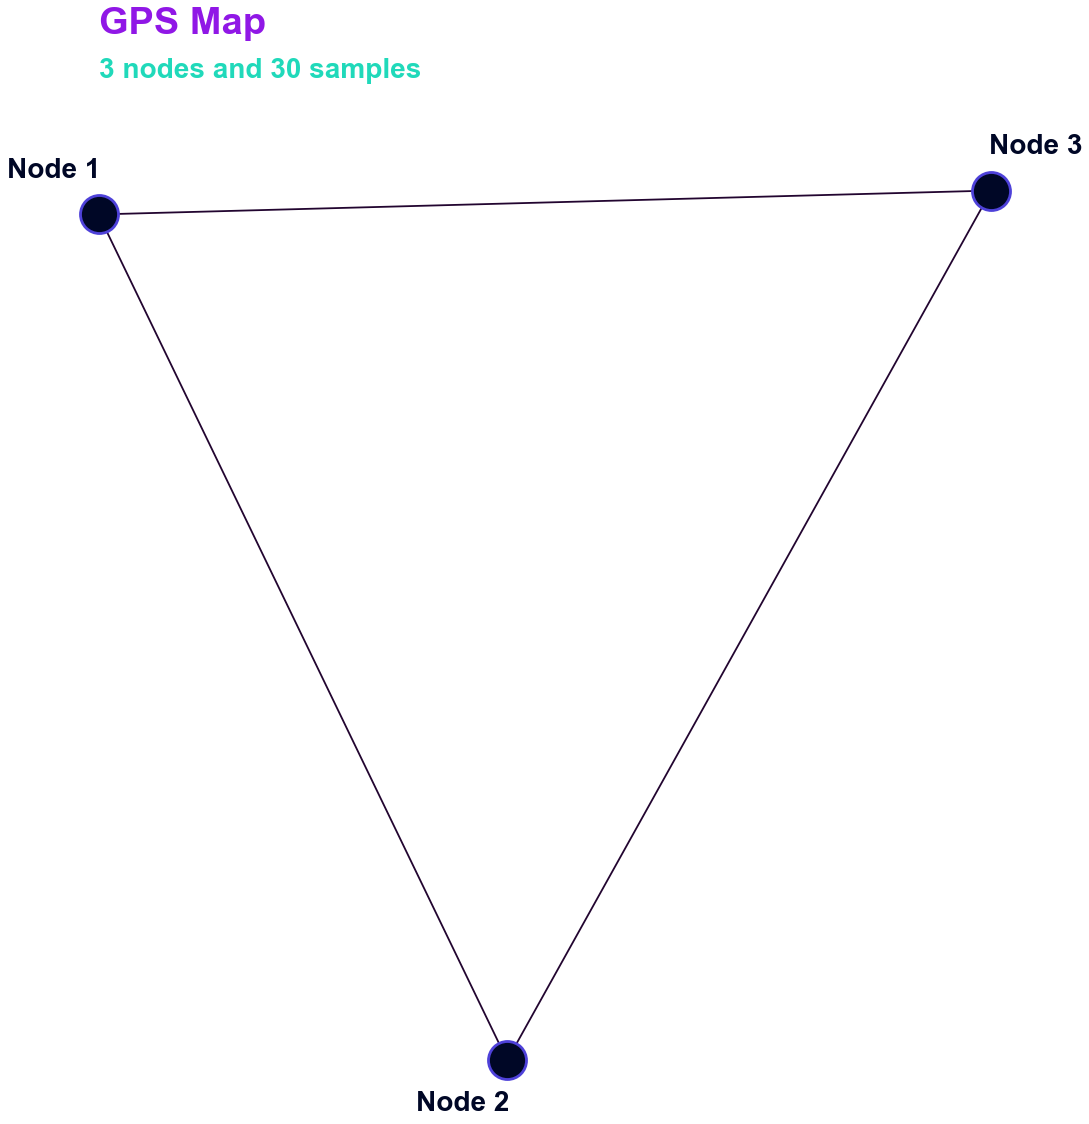

In [7]:
# Plot titles, nodes, and triangulation

gps_map.plot_titles_nodes_and_triangulation()

In [8]:
# Plot samples

gps_map.plot_samples()

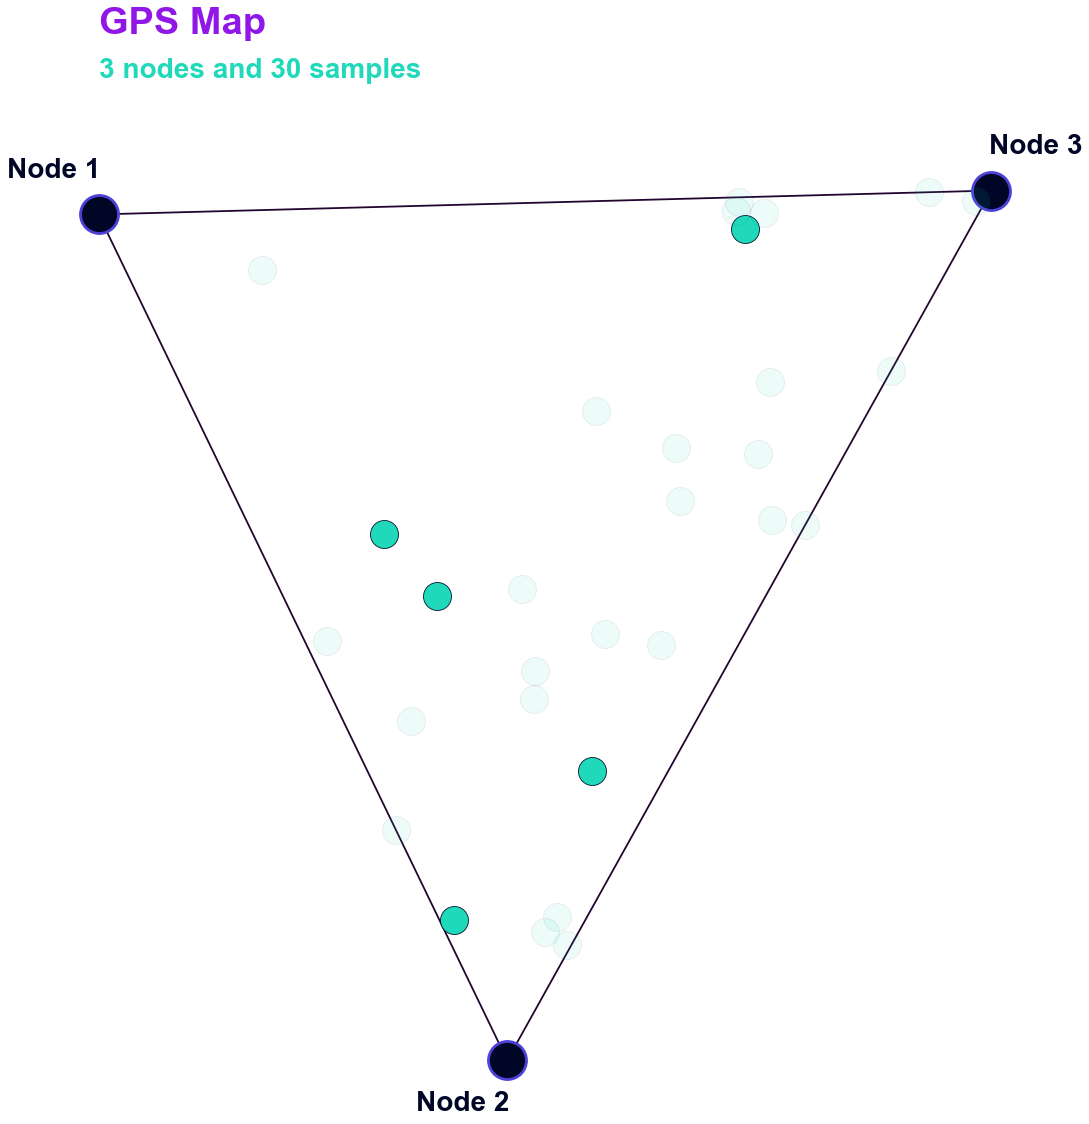

In [9]:
# Emphasize samples

samples_to_be_emphasized = [
    'Sample 1',
    'Sample 2',
    'Sample 8',
    'Sample 18',
    'Sample 26',
]

gps_map.plot_samples(samples_to_be_emphasized=samples_to_be_emphasized)

/Users/k/Jumis/tools/conda/envs/ccal/lib/python3.6/site-packages/matplotlib/colorbar.py:626: RuntimeWarning: invalid value encountered in less_equal
  b = b[(b <= intv[1] + eps) & (b >= intv[0] - eps)]
/Users/k/Jumis/tools/conda/envs/ccal/lib/python3.6/site-packages/matplotlib/colorbar.py:626: RuntimeWarning: invalid value encountered in greater_equal
  b = b[(b <= intv[1] + eps) & (b >= intv[0] - eps)]


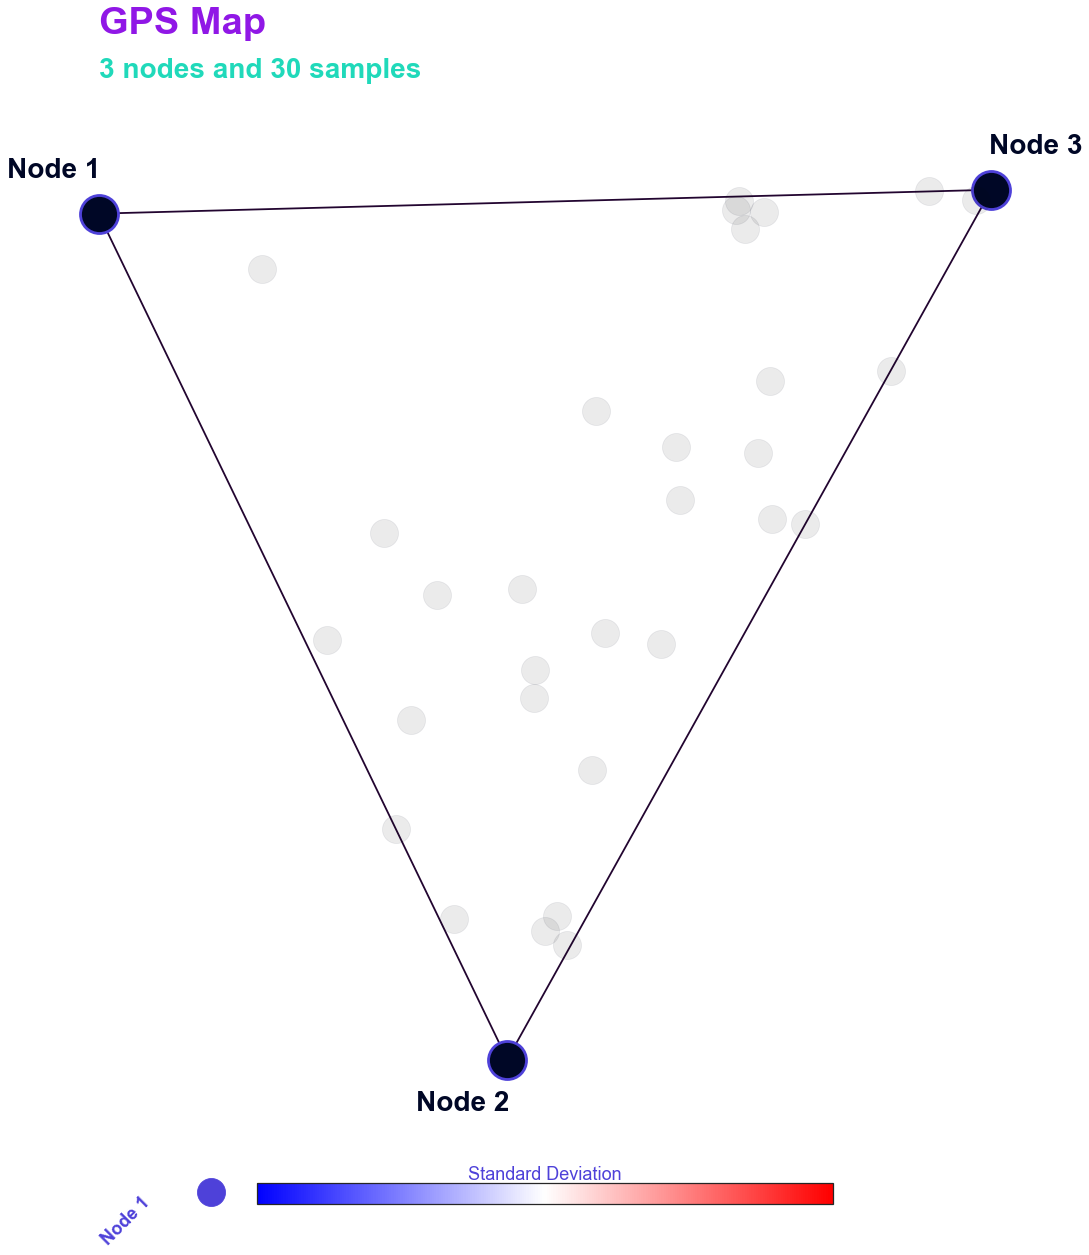

In [10]:
# Annotate samples

sample_x_annotation = node_x_sample.T.iloc[:, :1].copy()
sample_x_annotation.iloc[:, 0] = np.nan

annotation_types = ['continuous']
annotation_max_stds = [3]

gps_map.plot_samples_with_annotations(
    sample_x_annotation,
    annotation_types,
    annotation_max_stds=annotation_max_stds)

gps_map.plot_samples_with_annotations(
    sample_x_annotation,
    annotation_types,
    annotation_max_stds=annotation_max_stds,
    samples_to_be_emphasized=samples_to_be_emphasized)

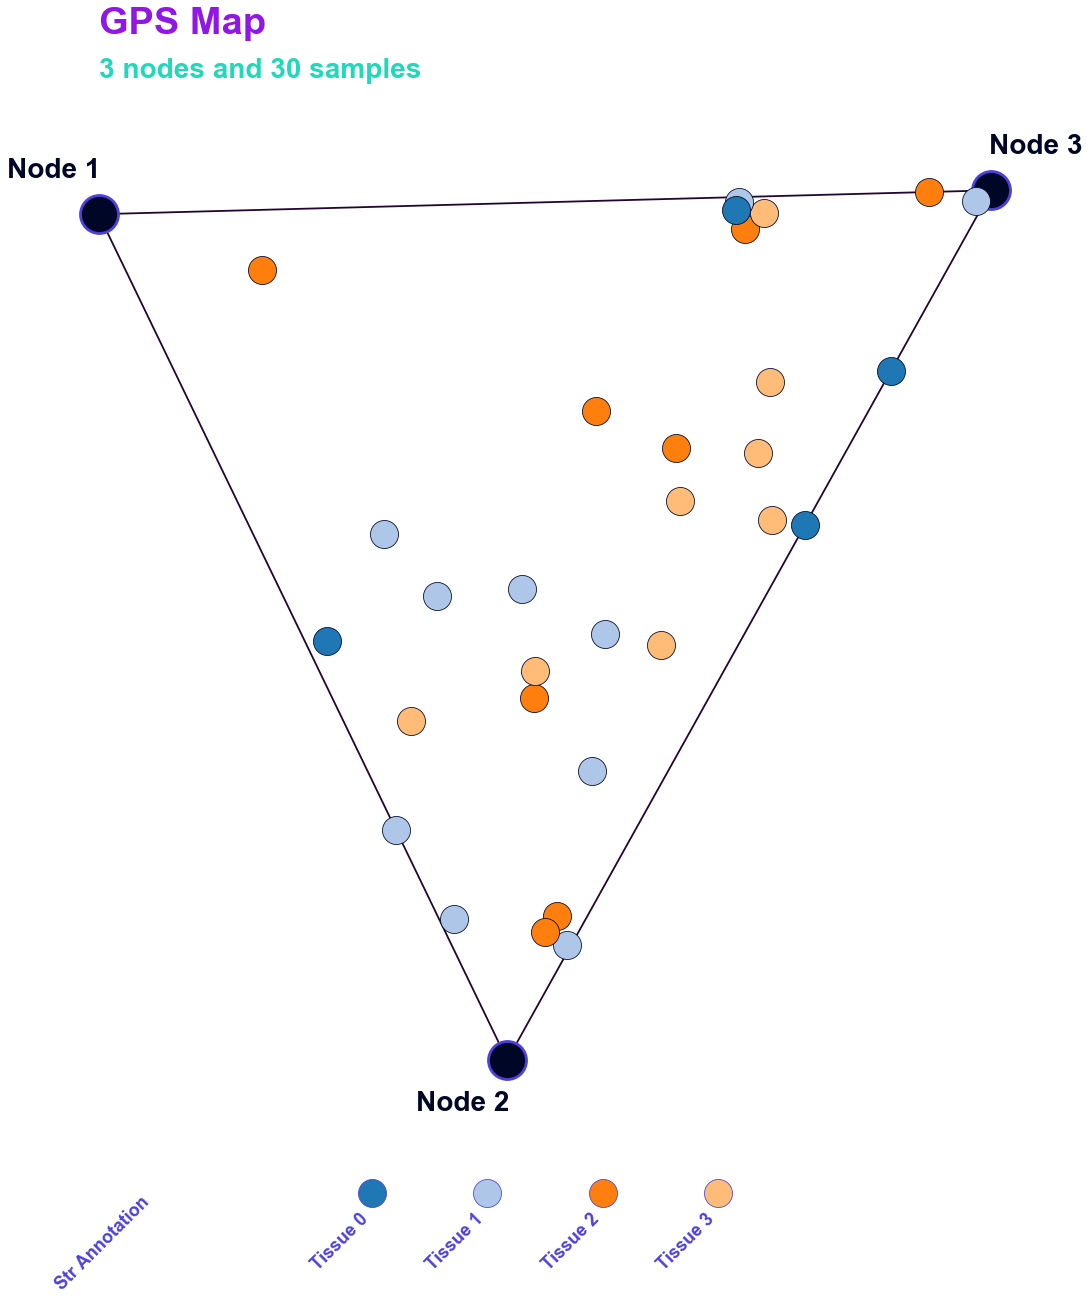

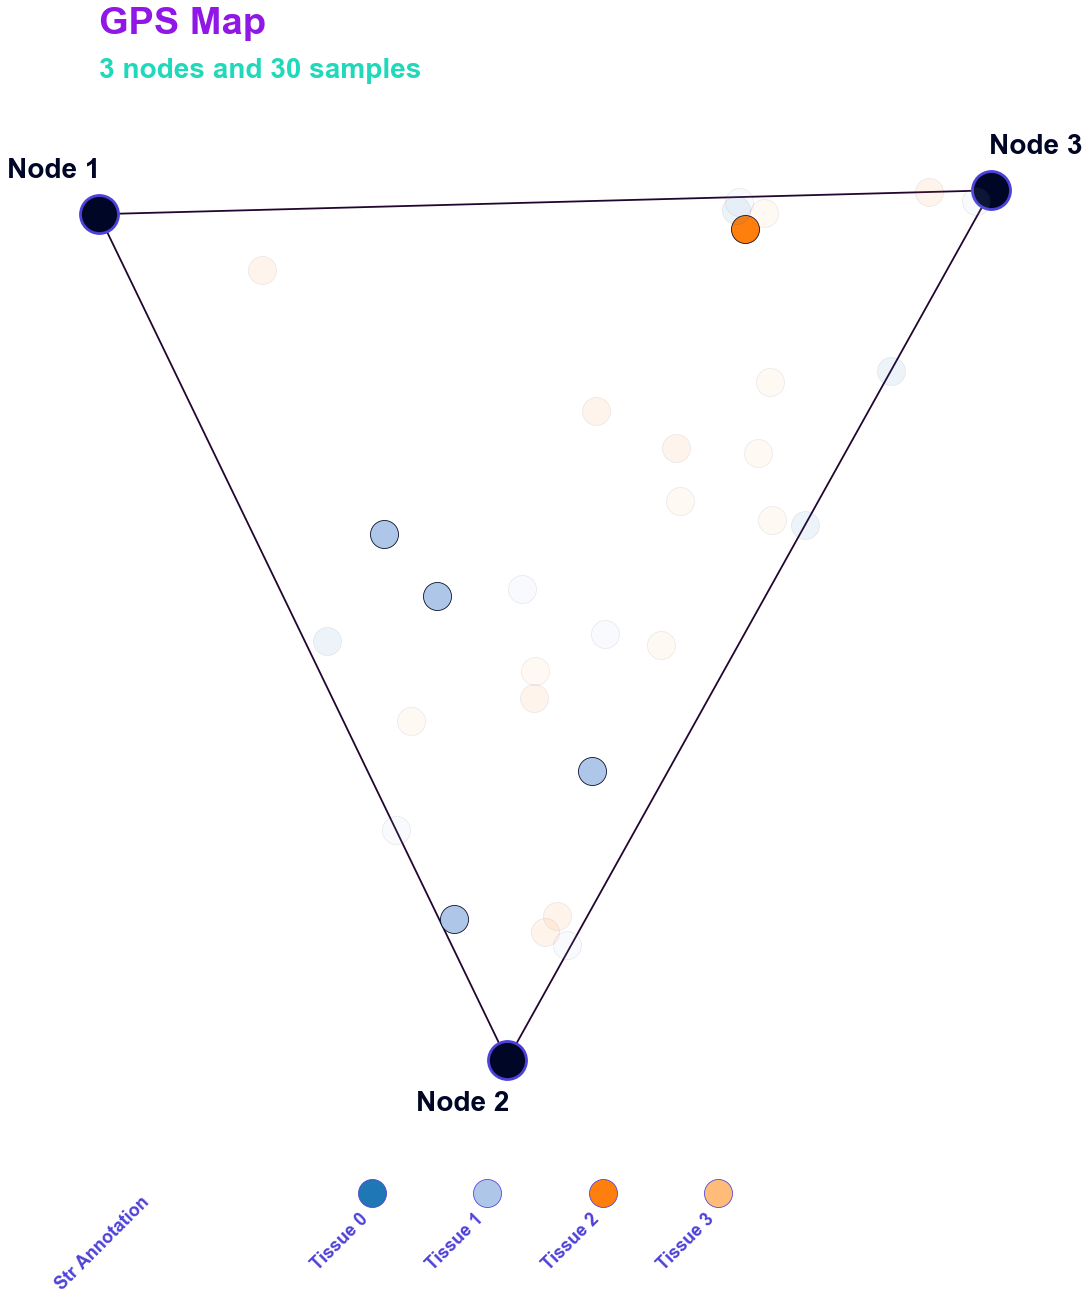

In [11]:
# Annotate samples

sample_x_annotation = pd.DataFrame(
    np.random.choice([0, 1, 2, 3], len(gps_map._samples)),
    index=gps_map._samples,
    columns=['Str Annotation'])

annotation_types = ['categorical']

annotation_to_strs = [{i: 'Tissue {}'.format(i) for i in [0, 1, 2, 3]}]

gps_map.plot_samples_with_annotations(
    sample_x_annotation,
    annotation_types,
    annotation_to_strs=annotation_to_strs)

gps_map.plot_samples_with_annotations(
    sample_x_annotation,
    annotation_types,
    samples_to_be_emphasized=samples_to_be_emphasized,
    annotation_to_strs=annotation_to_strs)

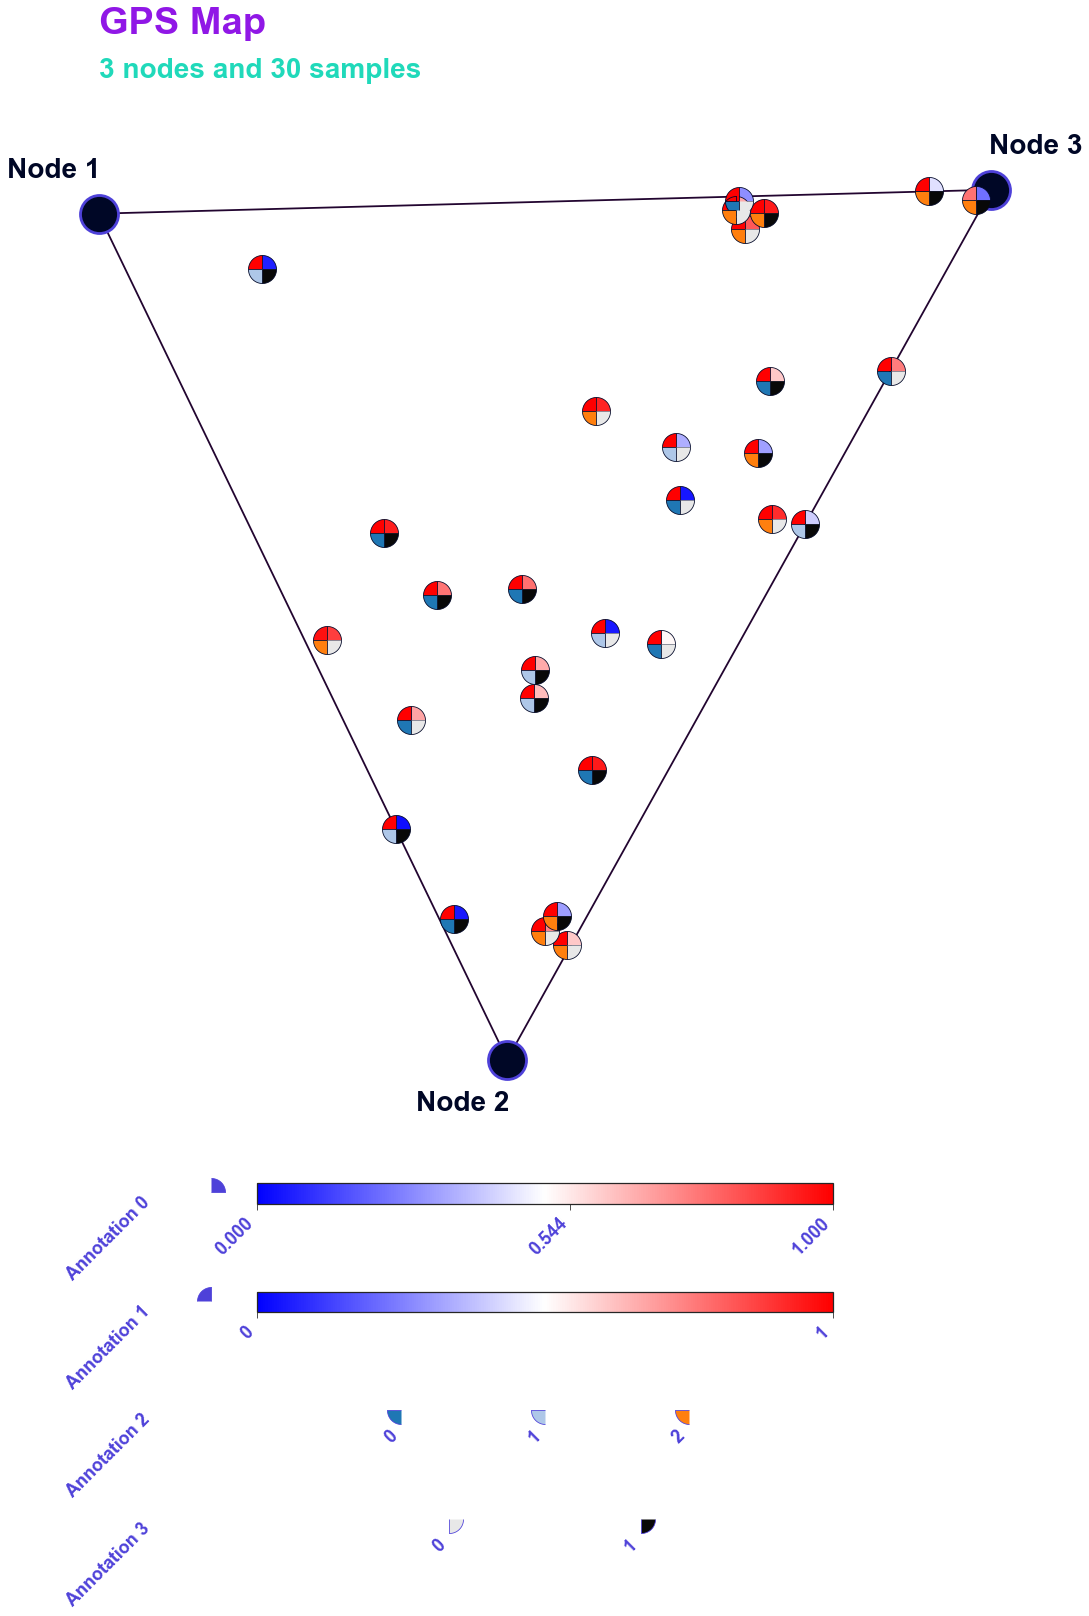

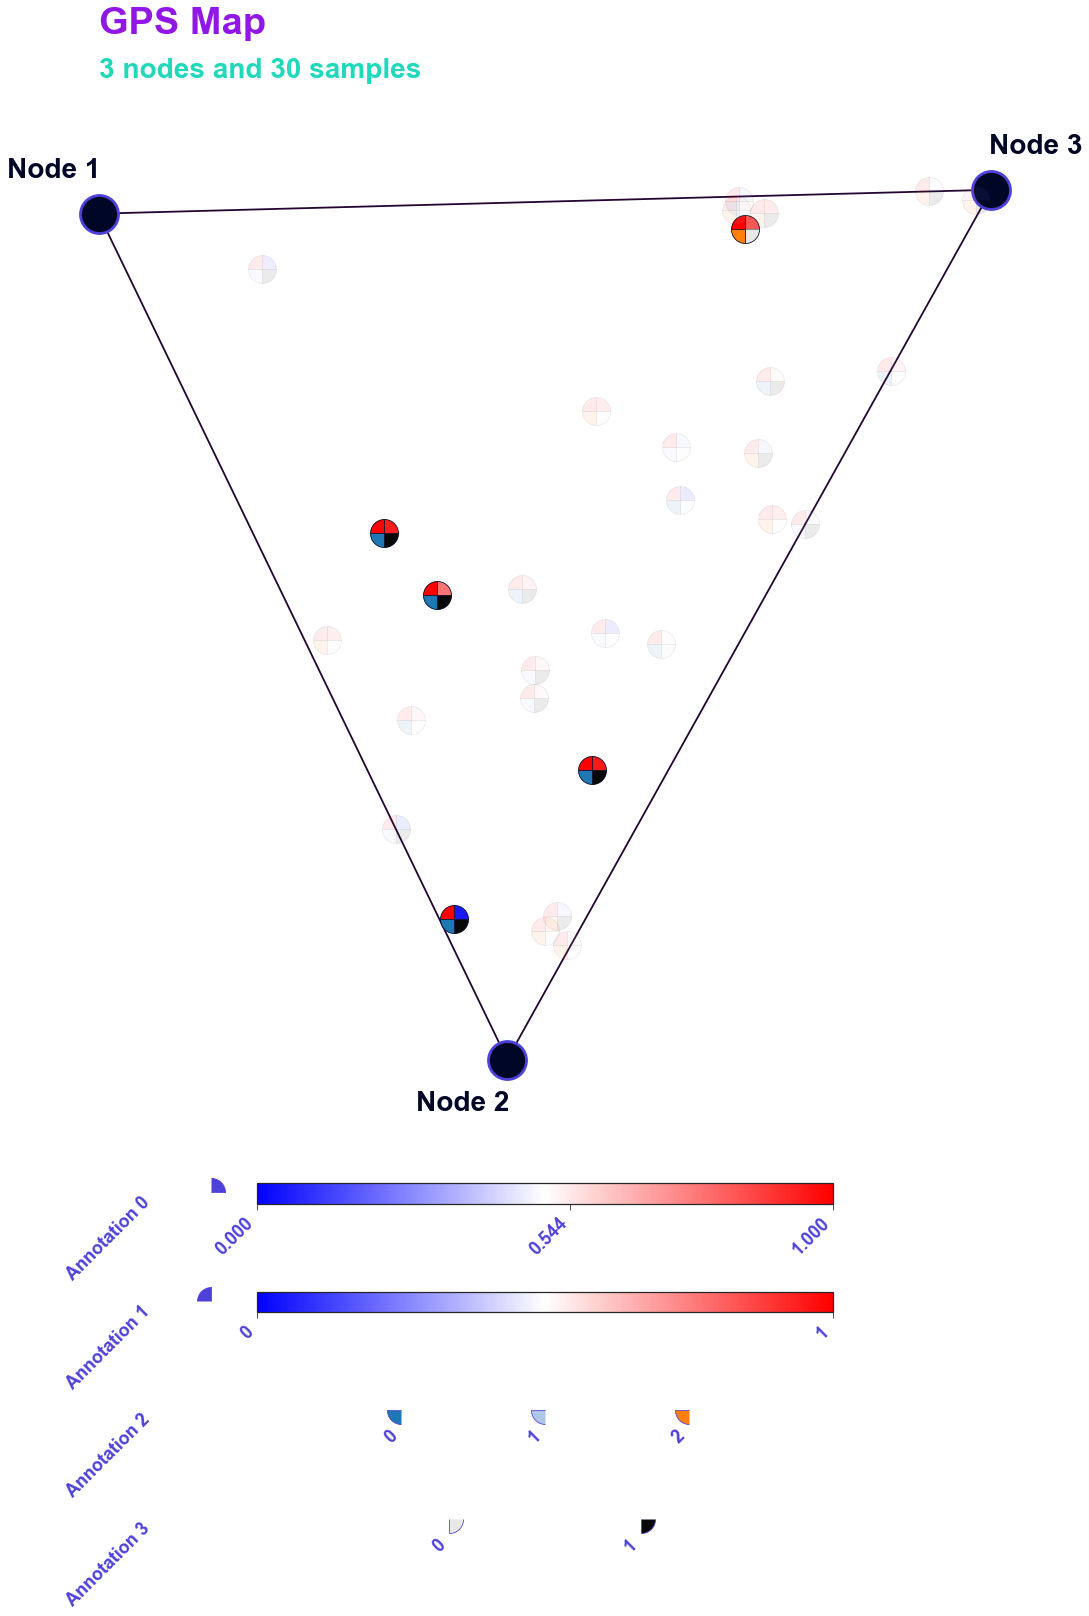

In [12]:
# Annotate samples with multiple annotations

sample_x_annotation = pd.DataFrame(
    [
        np.random.random_sample(len(gps_map._samples)),
        np.random.random_sample(len(gps_map._samples)) * 10,
        np.random.choice([0, 1, 2], len(gps_map._samples)),
        np.random.choice([0, 1], len(gps_map._samples)),
    ],
    index=[
        'Annotation 0',
        'Annotation 1',
        'Annotation 2',
        'Annotation 3',
    ],
    columns=gps_map._samples, ).T

annotation_types = [
    'continuous',
    'continuous',
    'categorical',
    'binary',
]

annotation_ranges = [
    [0, 1],
    [0, 1],
    None,
    None,
]

gps_map.plot_samples_with_annotations(
    sample_x_annotation, annotation_types, annotation_ranges=annotation_ranges)

gps_map.plot_samples_with_annotations(
    sample_x_annotation,
    annotation_types,
    annotation_ranges=annotation_ranges,
    samples_to_be_emphasized=samples_to_be_emphasized)

In [13]:
# Simulate sample phenotypes

n_phenotypes = 5

sample_phenotypes = pd.Series(
    np.random.choice(range(n_phenotypes), node_x_sample.shape[1]),
    name='Sample Phenotype',
    index=node_x_sample.columns)

sample_phenotypes

Sample 1     0
Sample 2     2
Sample 3     0
Sample 4     0
Sample 5     2
Sample 6     1
Sample 7     0
Sample 8     1
Sample 9     3
Sample 10    2
Sample 11    1
Sample 12    3
Sample 13    2
Sample 14    1
Sample 15    1
Sample 16    1
Sample 17    0
Sample 18    0
Sample 19    2
Sample 20    2
Sample 21    3
Sample 22    4
Sample 23    2
Sample 24    2
Sample 25    1
Sample 26    4
Sample 27    0
Sample 28    2
Sample 29    4
Sample 30    0
Name: Sample Phenotype, dtype: int64

/Users/k/Jumis/tools/conda/envs/ccal/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'aspect', 'linestyle', 'aa', 'clip_on'
  s)


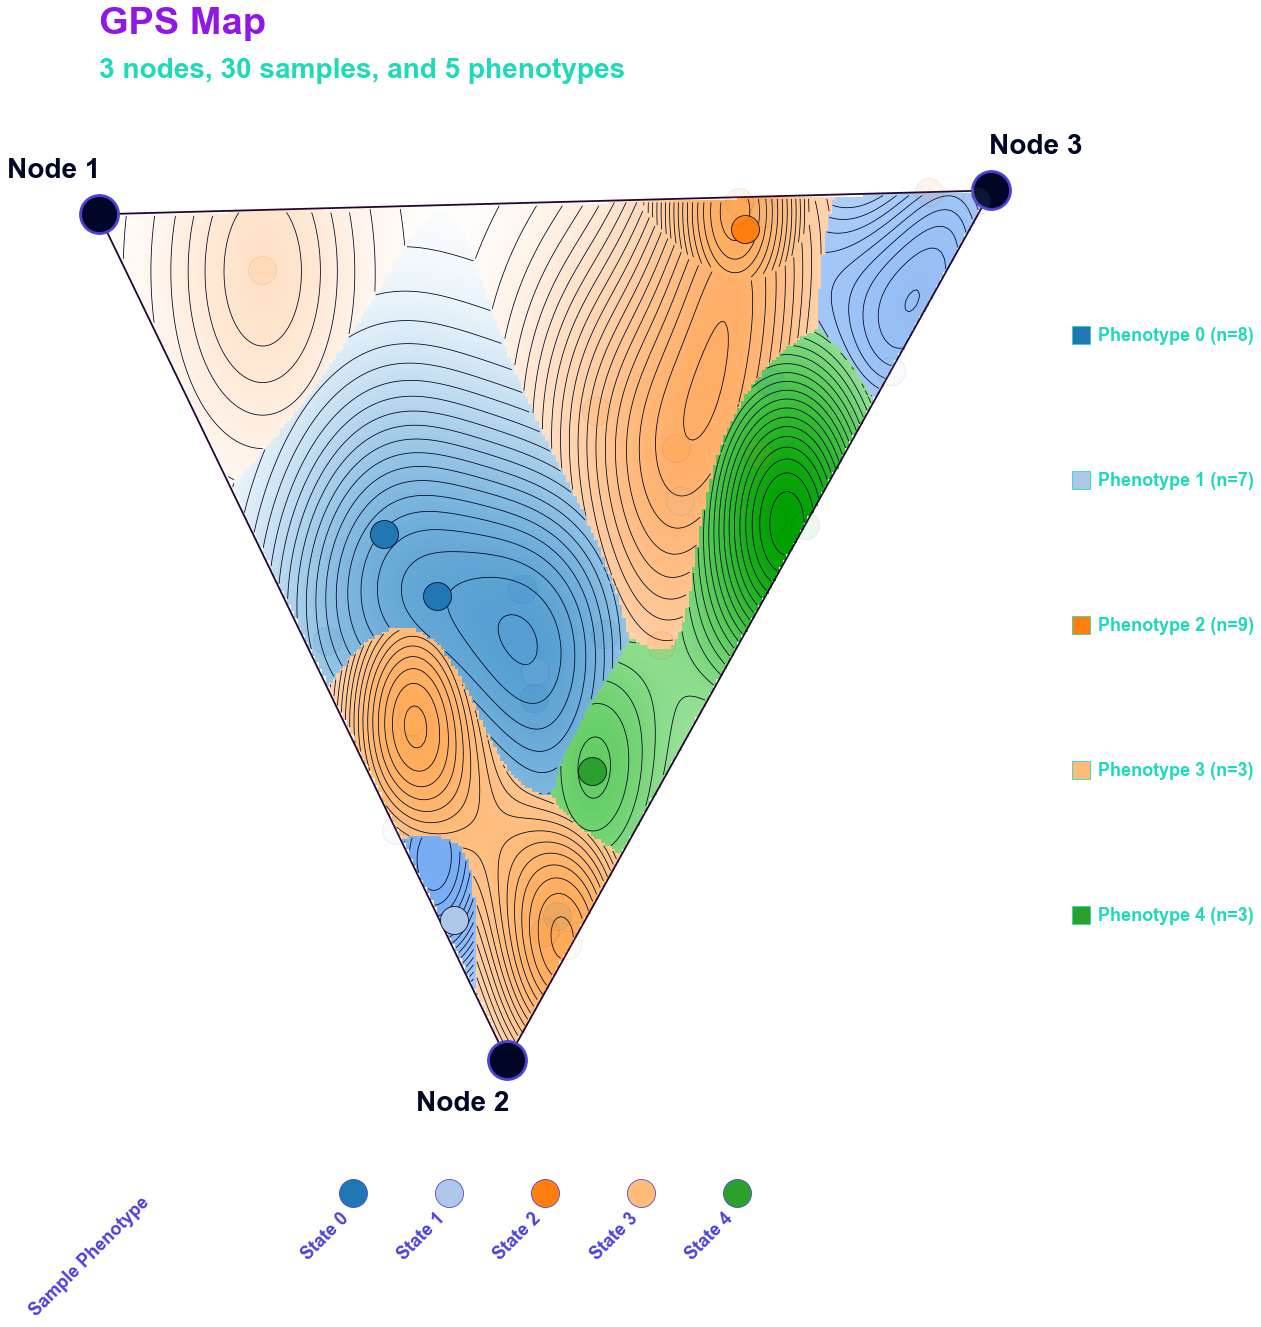

In [14]:
# Set sample phenotype

gps_map.set_sample_phenotypes(
    sample_phenotypes,
    phenotype_to_str={i: 'State {}'.format(i)
                      for i in range(n_phenotypes)})

gps_map.plot_samples_with_phenotype()

gps_map.plot_samples_with_phenotype(
    samples_to_be_emphasized=samples_to_be_emphasized)

In [15]:
# Plot centroid

gps_map.plot_phenotype_centroids()

/Users/k/Jumis/tools/conda/envs/ccal/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'aspect', 'linestyle', 'aa', 'clip_on'
  s)


In [16]:
# Style

gps_map.sample_marker_style['markersize'] = 50

gps_map.triangulation_style['linewidth'] = 0.7
gps_map.triangulation_style['color'] = '#000000'

gps_map.background_boundary_alpha_factor = 1
gps_map.background_boundary_color = None

gps_map.n_contours = 8
gps_map.contour_style['linewidths'] = 0.8
gps_map.contour_style['color'] = '#262626'
gps_map.contour_style['alpha'] = 0.18

gps_map.plot_samples_with_phenotype()

gps_map.plot_samples_with_phenotype(
    samples_to_be_emphasized=samples_to_be_emphasized)

/Users/k/Jumis/tools/conda/envs/ccal/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'aspect', 'linestyle', 'aa', 'clip_on', 'color'
  s)


/Users/k/Jumis/tools/conda/envs/ccal/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'aspect', 'linestyle', 'aa', 'clip_on', 'color'
  s)
/Users/k/Jumis/tools/conda/envs/ccal/lib/python3.6/site-packages/seaborn/categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


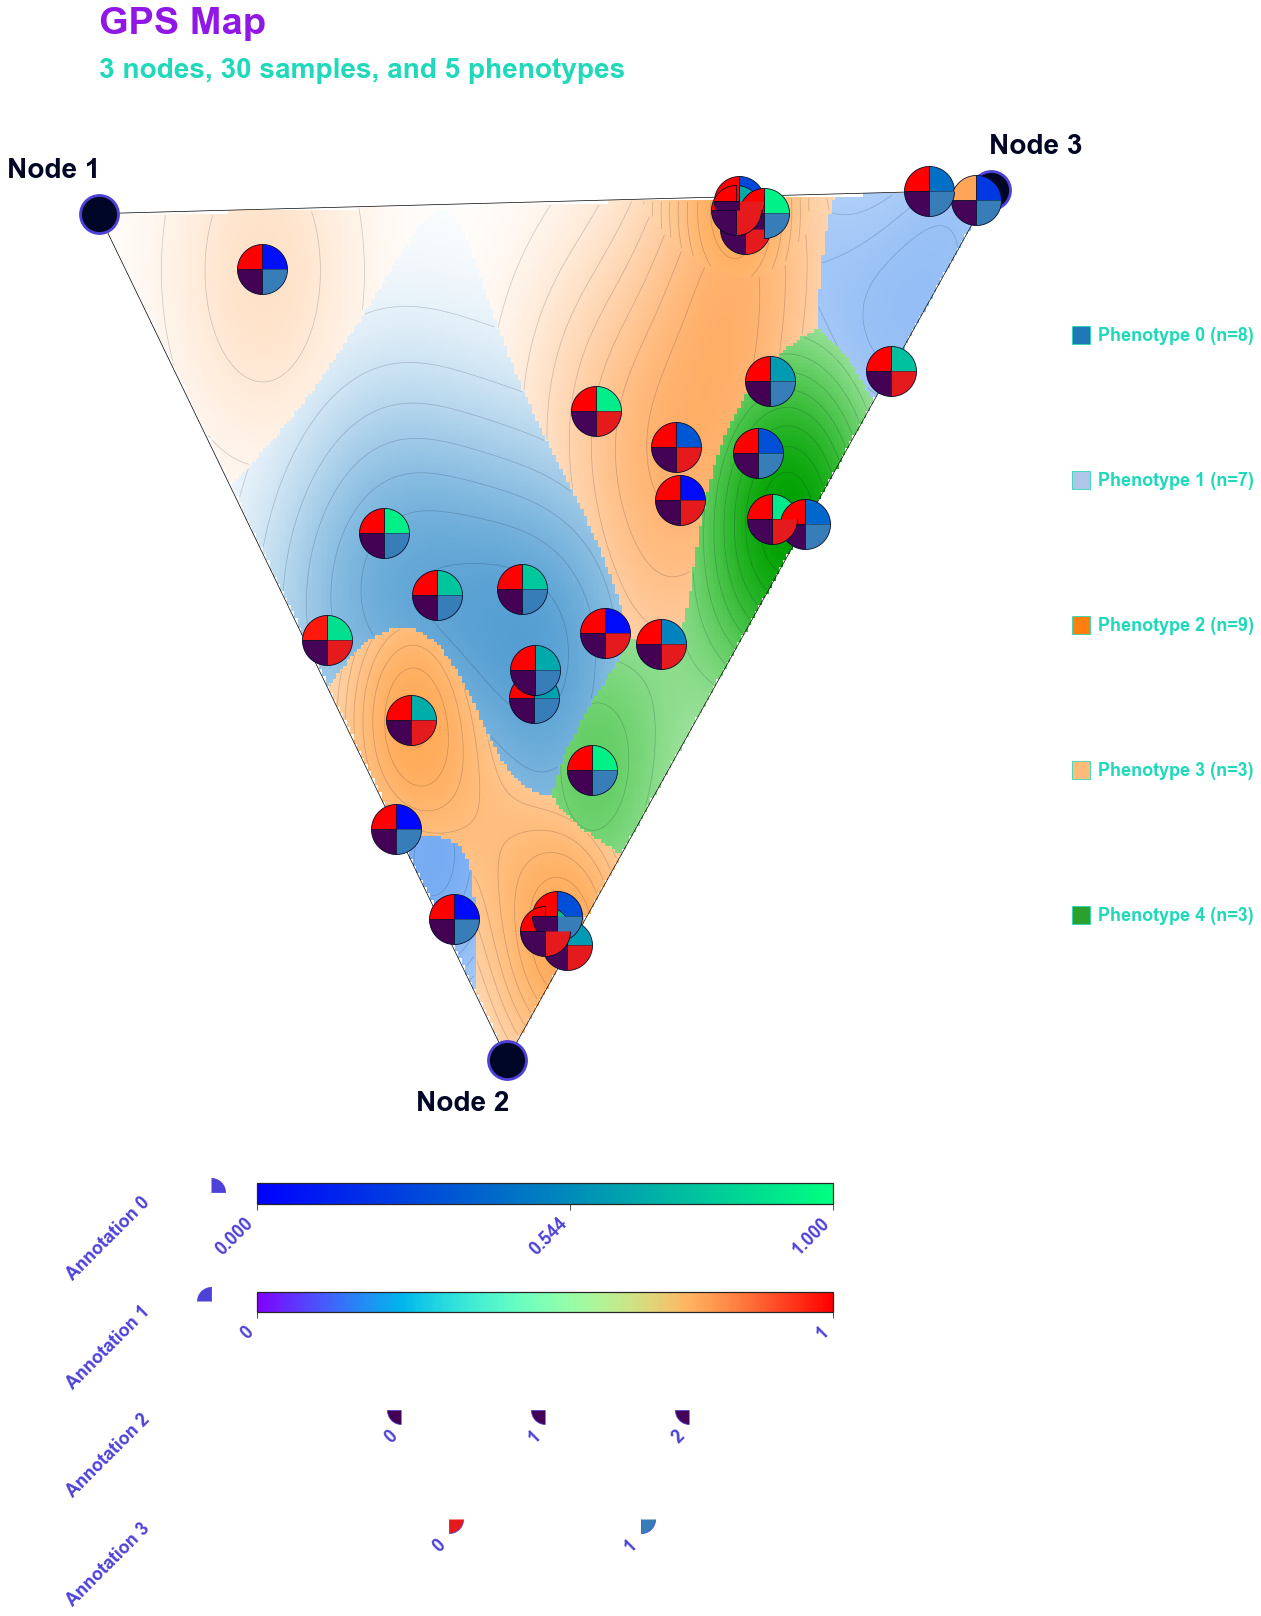

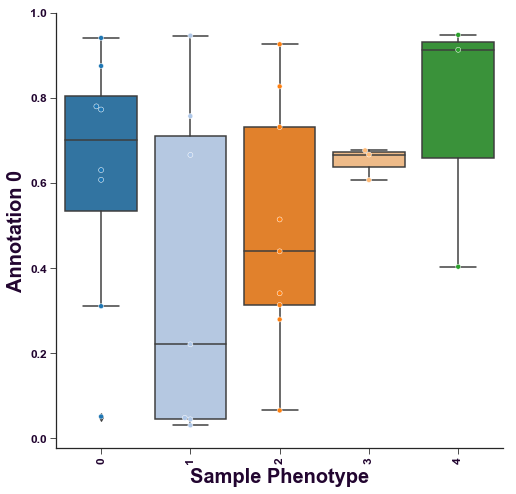

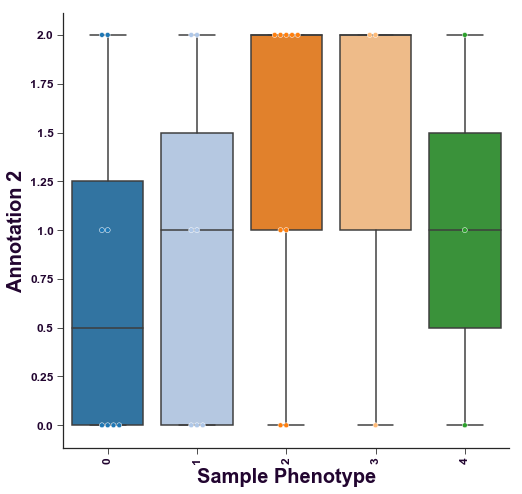

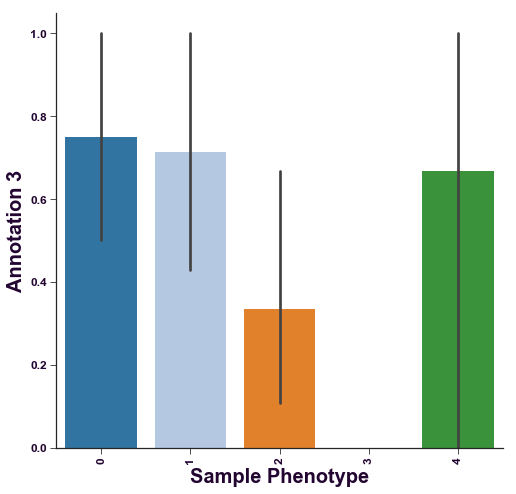

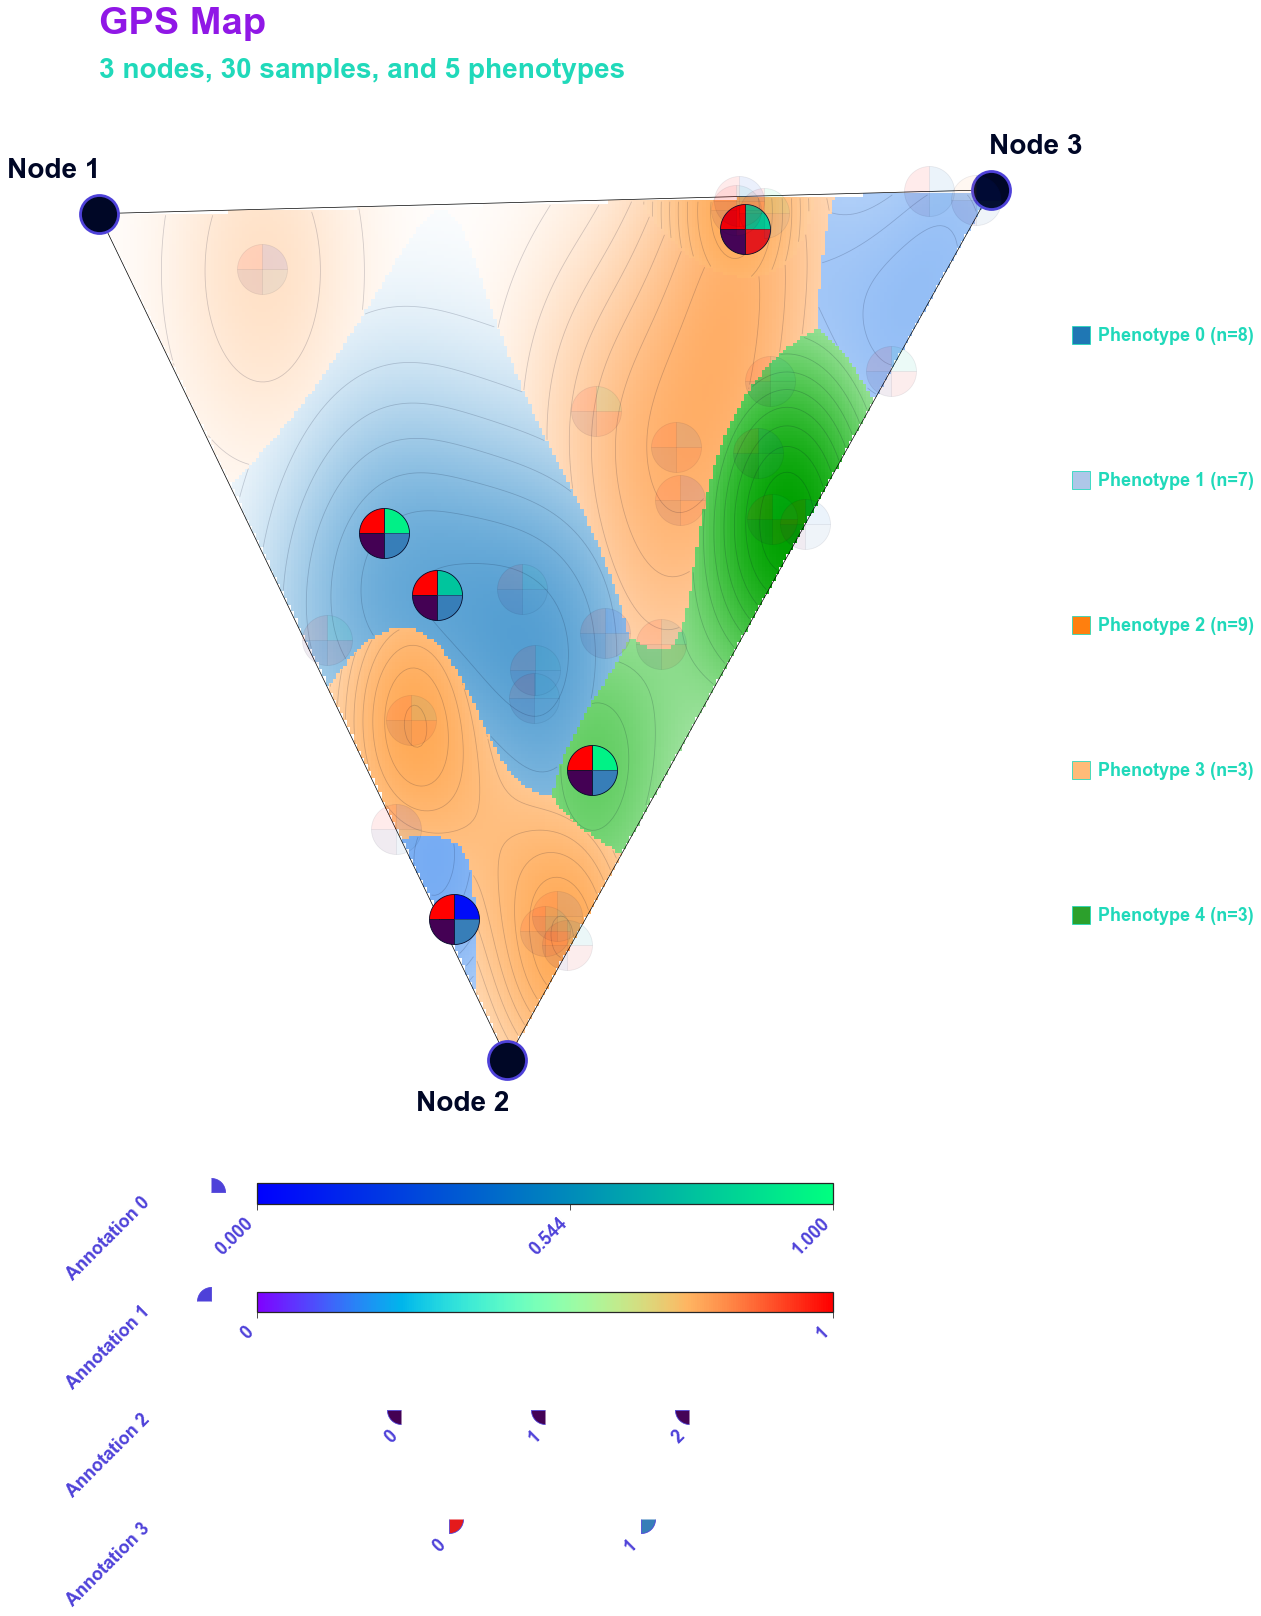

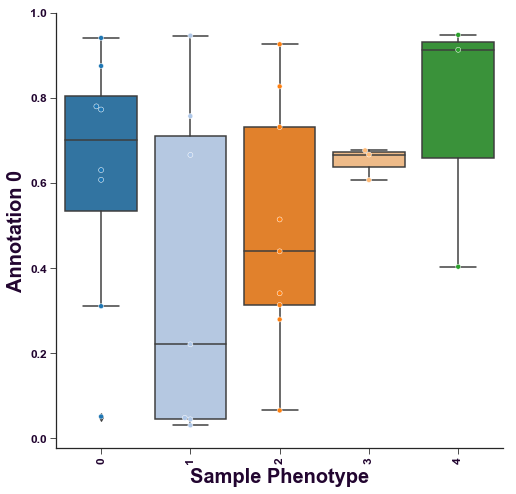

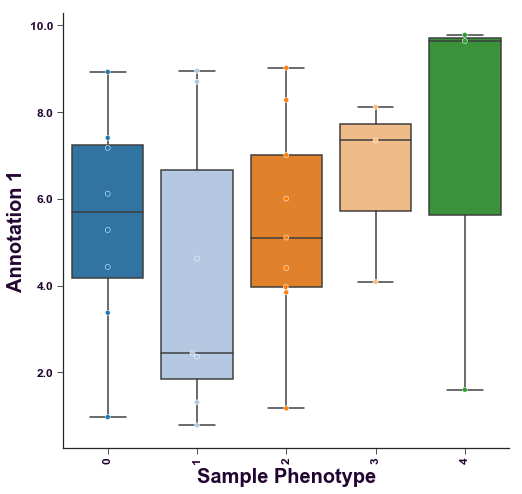

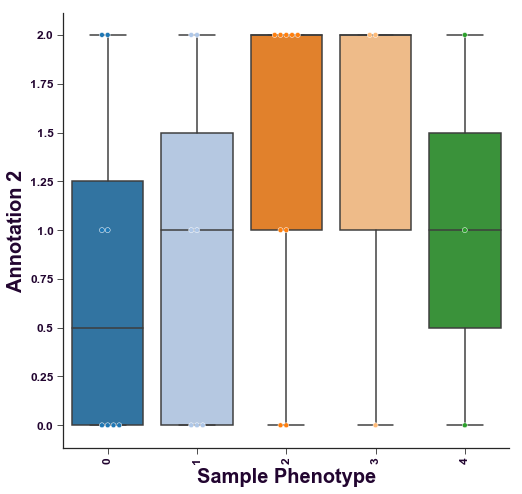

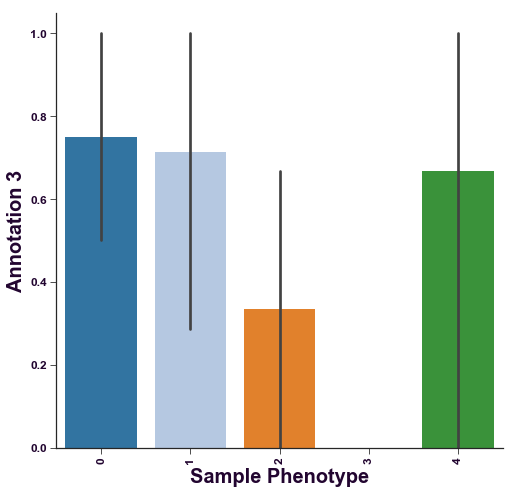

In [17]:
# Annotate samples

annotation_color_maps = [
    mpl.cm.winter,
    mpl.cm.rainbow,
    mpl.cm.viridis,
    mpl.cm.Set1,
]

gps_map.plot_samples_with_annotations(
    sample_x_annotation,
    annotation_types,
    annotation_color_maps=annotation_color_maps,
    annotation_ranges=annotation_ranges)

gps_map.plot_samples_with_annotations(
    sample_x_annotation,
    annotation_types,
    annotation_color_maps=annotation_color_maps,
    annotation_ranges=annotation_ranges,
    samples_to_be_emphasized=samples_to_be_emphasized)

/Users/k/Jumis/tools/conda/envs/ccal/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'aspect', 'linestyle', 'aa', 'clip_on', 'color'
  s)


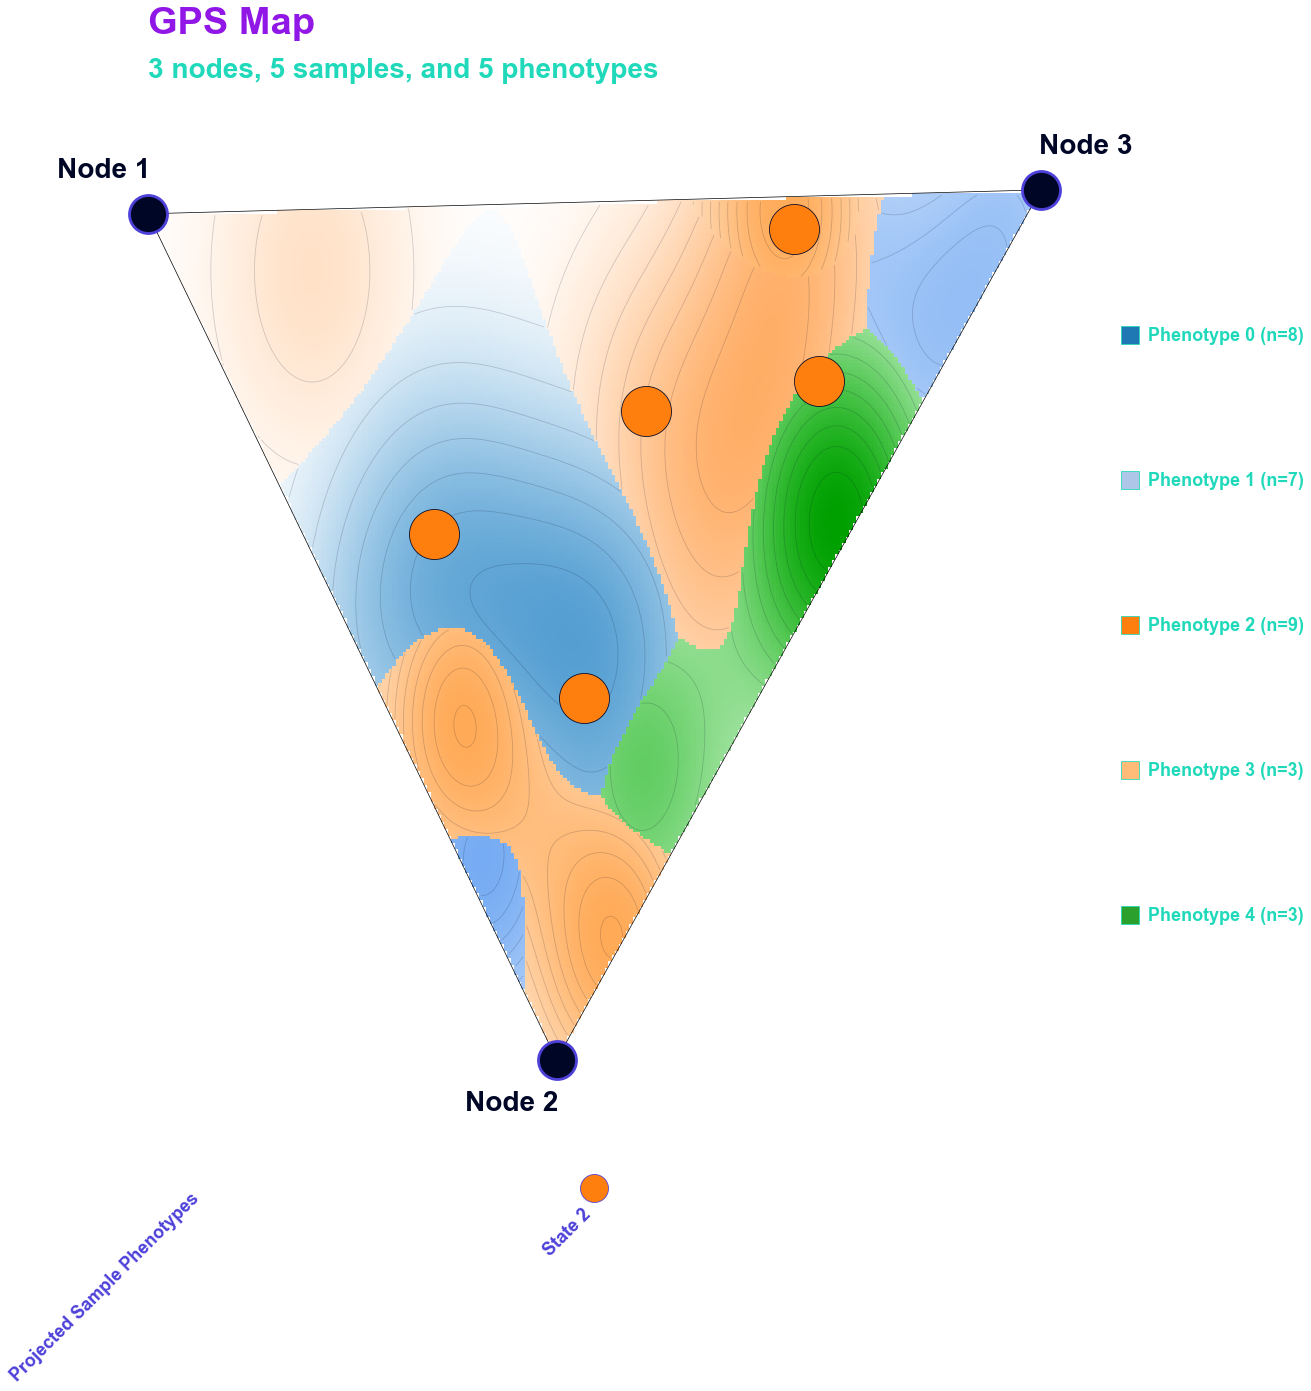

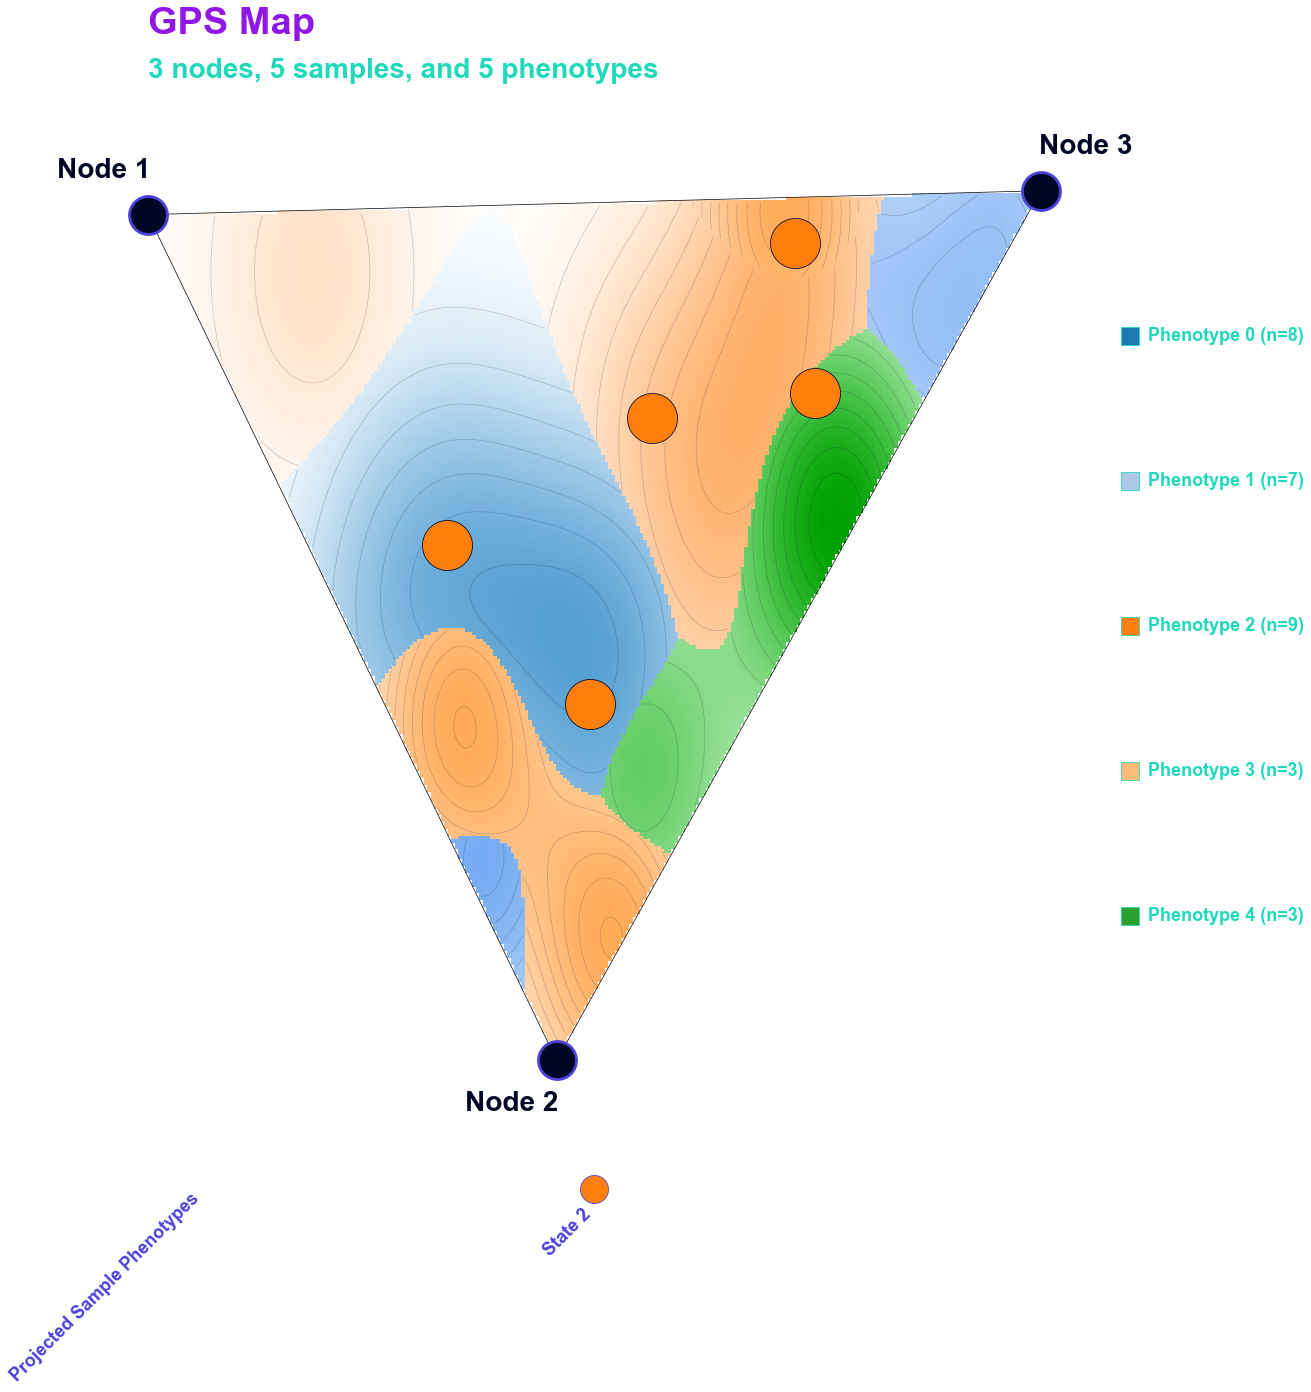

In [18]:
# Project samples

n = 5

gps_map.project_samples(
    node_x_sample.iloc[:, :n], normalization_method='by_map')

gps_map.plot_samples_with_phenotype(sample_type='projected')

gps_map.project_samples(
    node_x_sample.iloc[:, :n], normalization_method='by_data')
gps_map.plot_samples_with_phenotype(sample_type='projected')

gps_map.project_samples(node_x_sample.iloc[:, :n], normalization_method=None)
gps_map.plot_samples_with_phenotype(sample_type='projected')

In [19]:
# Save GPSMap

GPSMap.save(gps_map, 'gps_map.pickle.gz')

/Users/k/Jumis/tools/conda/envs/ccal/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'aspect', 'linestyle', 'aa', 'clip_on', 'color'
  s)


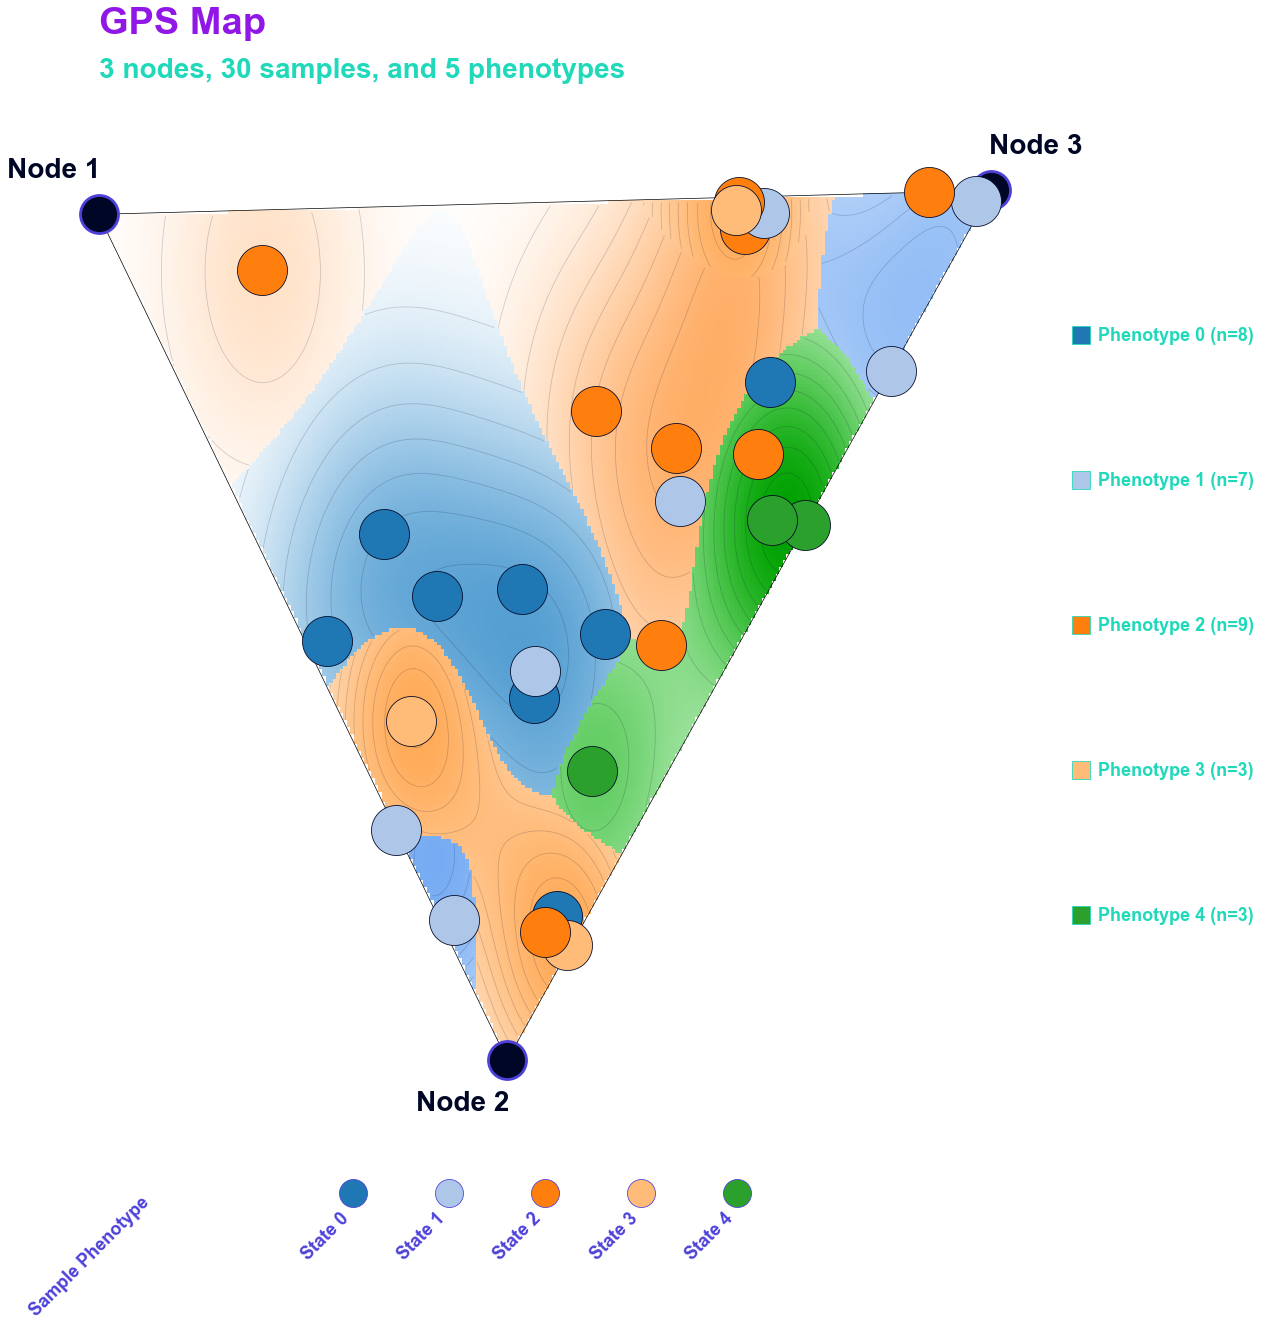

In [20]:
# Load GPSMap and plot

loaded_gps_map = GPSMap.load('gps_map.pickle.gz')

loaded_gps_map.plot_samples_with_phenotype(file_path='gps_map.png')